### Importing Required Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.model_selection import train_test_split
from category_encoders import CatBoostEncoder,TargetEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
import statsmodels.api as sma
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'

plt.rcParams['figure.figsize'] = [15,8]

# Creating custom color
colors = ['#97C1A9','#DCDCDC','#AFC197','#9AC197','#97C1BE','#97C1A2','#C1979A',
          '#A997C1','#77AE8F','#DCDCDC','#67A481','#C197AF']

### Reading the dataset and viewing first five rows

In [3]:
pd.set_option('display.max_columns',22)

In [4]:
df = pd.read_csv('Airbnb_Price.csv')

df.head()

City      Day     realSum     room_type  room_shared  room_private  \
0  Amsterdam  Weekday  194.033698  Private room        False          True   
1  Amsterdam  Weekday  344.245776  Private room        False          True   
2  Amsterdam  Weekday  264.101422  Private room        False          True   
3  Amsterdam  Weekday  433.529398  Private room        False          True   
4  Amsterdam  Weekday  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                2              False      1    0                  10   
1                4              False      0    0                   8   
2                2              False      0    1                   9   
3                4              False      0    1                   9   
4                2               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    2.539380   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    3.651621   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  
0         4.166708   98.253896         6.846473  4.90569  52.41772  
1        33.421209  837.280757        58.342928  4.90005  52.37432  
2         3.985908   95.386955         6.646700  4.97512  52.36103  
3        26.119108  875.033098        60.973565  4.89417  52.37663  
4        29.272733  815.305740        56.811677  4.90051  52.37508

### Checking the shape and dimension of dataset

In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 51707 rows and 21 columns


In [6]:
print(f'The dimension of the dataset is {df.ndim}')

The dimension of the dataset is 2


### Checking the datatype, number of non null values and name of each variable in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        51707 non-null  object 
 1   Day                         51707 non-null  object 
 2   realSum                     51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  int64  
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  int64  
 11  guest_satisfaction_overall  51707 non-null  int64  
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

### Checking for the missing values. Displaying number of missing values per column

In [8]:
missing_values = pd.DataFrame({'Number of missing values':df.isnull().sum(),
                              'Percentage of missing values':df.isnull().sum()/len(df)})

missing_values

Number of missing values  \
City                                               0   
Day                                                0   
realSum                                            0   
room_type                                          0   
room_shared                                        0   
room_private                                       0   
person_capacity                                    0   
host_is_superhost                                  0   
multi                                              0   
biz                                                0   
cleanliness_rating                                 0   
guest_satisfaction_overall                         0   
bedrooms                                           0   
dist                                               0   
metro_dist                                         0   
attr_index                                         0   
attr_index_norm                                    0   
rest_index                                         0   
rest_index_norm                                    0   
lng                                                0   
lat                                                0   

                            Percentage of missing values  
City                                                 0.0  
Day                                                  0.0  
realSum                                              0.0  
room_type                                            0.0  
room_shared                                          0.0  
room_private                                         0.0  
person_capacity                                      0.0  
host_is_superhost                                    0.0  
multi                                                0.0  
biz                                                  0.0  
cleanliness_rating                                   0.0  
guest_satisfaction_overall                           0.0  
bedrooms                                             0.0  
dist                                                 0.0  
metro_dist                                           0.0  
attr_index                                           0.0  
attr_index_norm                                      0.0  
rest_index                                           0.0  
rest_index_norm                                      0.0  
lng                                                  0.0  
lat                                                  0.0

From above dataframe we can see that there are no missing values present in the dataset

### Dropping of irrelevant columns from the dataset

We can drop room_shared and room_private columns as they are subset of room_type column and attr_index , rest_index as there is normalised values of those columns is already there.

In [9]:
df.drop(columns = ['room_shared','room_private'] , inplace = True)

### Checking for the descriptive statistics of the dataset

In [10]:
df.describe(include = 'object').T

count unique              top   freq
City       51707     10           London   9993
Day        51707      2          Weekend  26207
room_type  51707      3  Entire home/apt  32648

From above report we could infer that :-
    
1) There are 10 unique cities listed and majority of the properties are listed from the city London with frequency of 9993

2) Majority of the bookings was made on weekends than weekdays

3) For room type most customers preferred entire home or apartment


In [11]:
df.describe().T

count        mean         std        min  \
realSum                     51707.0  279.879591  327.948386  34.779339   
person_capacity             51707.0    3.161661    1.298545   2.000000   
multi                       51707.0    0.291353    0.454390   0.000000   
biz                         51707.0    0.350204    0.477038   0.000000   
cleanliness_rating          51707.0    9.390624    0.954868   2.000000   
guest_satisfaction_overall  51707.0   92.628232    8.945531  20.000000   
bedrooms                    51707.0    1.158760    0.627410   0.000000   
dist                        51707.0    3.191285    2.393803   0.015045   
metro_dist                  51707.0    0.681540    0.858023   0.002301   
attr_index                  51707.0  294.204105  224.754123  15.152201   
attr_index_norm             51707.0   13.423792    9.807985   0.926301   
rest_index                  51707.0  626.856696  497.920226  19.576924   
rest_index_norm             51707.0   22.786177   17.804096   0.592757   
lng                         51707.0    7.426068    9.799725  -9.226340   
lat                         51707.0   45.671128    5.249263  37.953000   

                                   25%         50%         75%           max  
realSum                     148.752174  211.343089  319.694286  18545.450280  
person_capacity               2.000000    3.000000    4.000000      6.000000  
multi                         0.000000    0.000000    1.000000      1.000000  
biz                           0.000000    0.000000    1.000000      1.000000  
cleanliness_rating            9.000000   10.000000   10.000000     10.000000  
guest_satisfaction_overall   90.000000   95.000000   99.000000    100.000000  
bedrooms                      1.000000    1.000000    1.000000     10.000000  
dist                          1.453142    2.613538    4.263077     25.284557  
metro_dist                    0.248480    0.413269    0.737840     14.273577  
attr_index                  136.797385  234.331748  385.756381   4513.563486  
attr_index_norm               6.380926   11.468305   17.415082    100.000000  
rest_index                  250.854114  522.052783  832.628988   6696.156772  
rest_index_norm               8.751480   17.542238   32.964603    100.000000  
lng                          -0.072500    4.873000   13.518825     23.786020  
lat                          41.399510   47.506690   51.471885     52.641410

### Univariate Analysis

In [12]:
df.columns

Index(['City', 'Day', 'realSum', 'room_type', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat'],
      dtype='object')

#### City

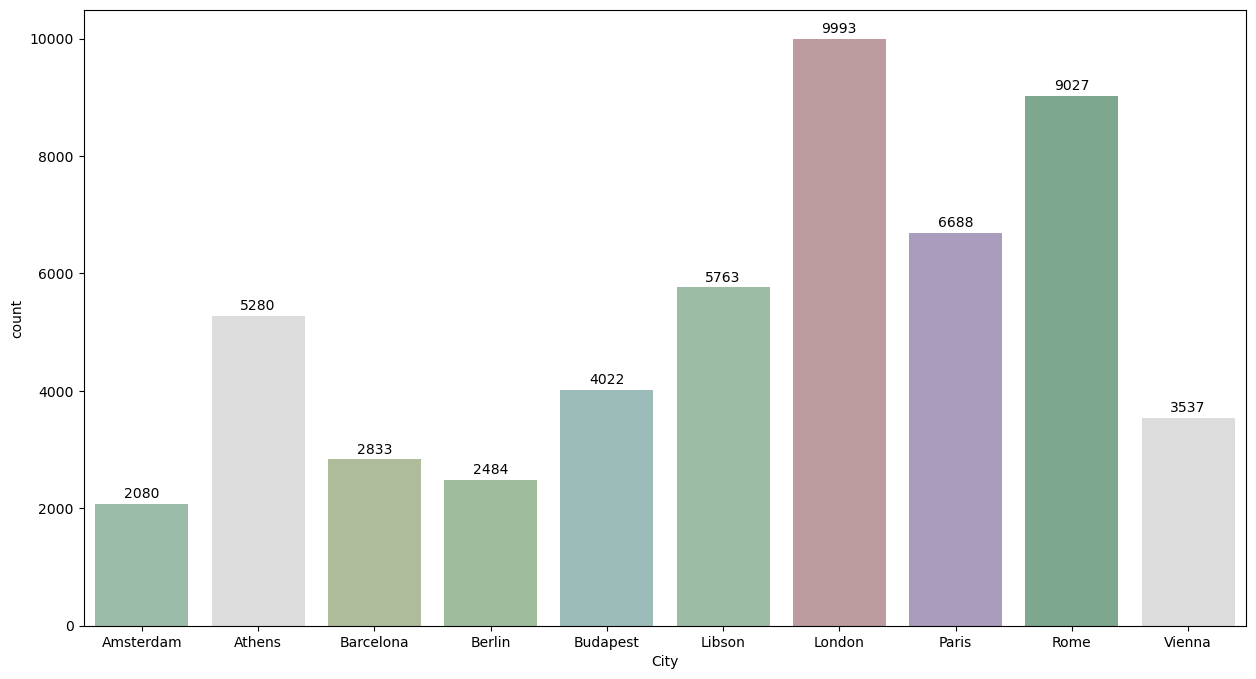

In [13]:
sns.countplot(df['City'].sort_values() , palette = colors )

for i,v in enumerate(df['City'].value_counts().sort_index()):
    plt.text(x = i , y = v + 100, s = v , ha = 'center')


#### Day

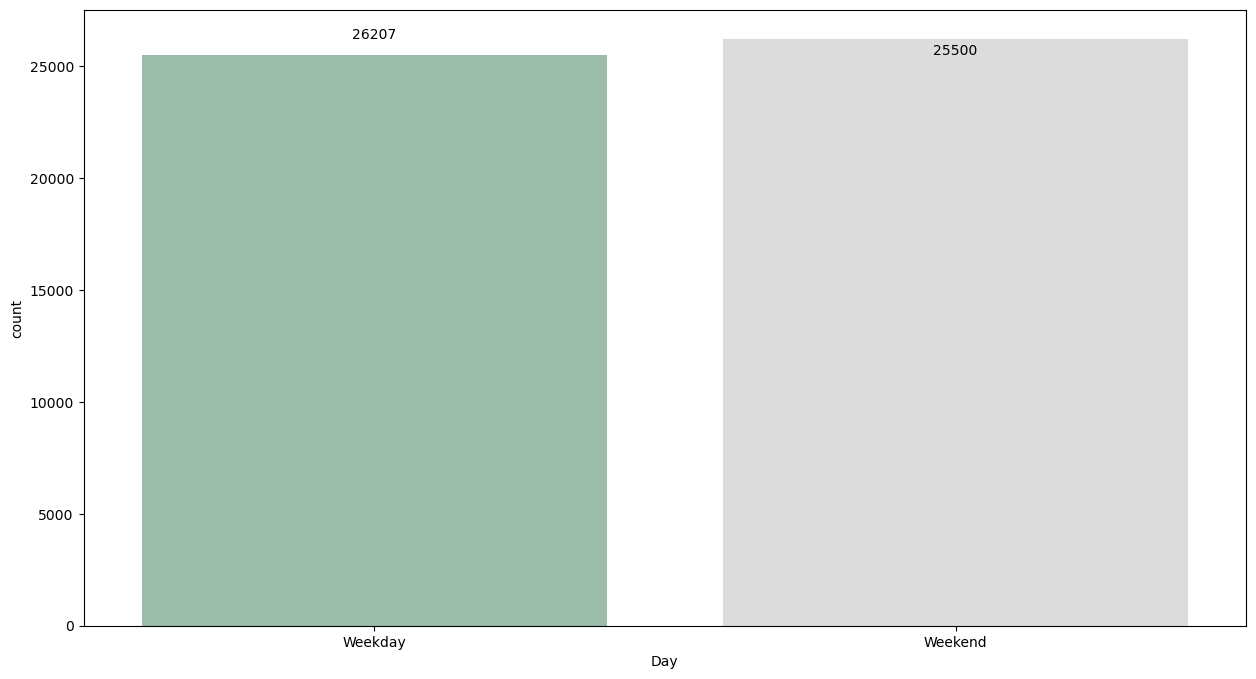

In [14]:
sns.countplot(df['Day'] , palette = colors)

for i,v in enumerate(df['Day'].value_counts()):
    plt.text(x = i , y = v , s = v , ha = 'center')

#### Room_type

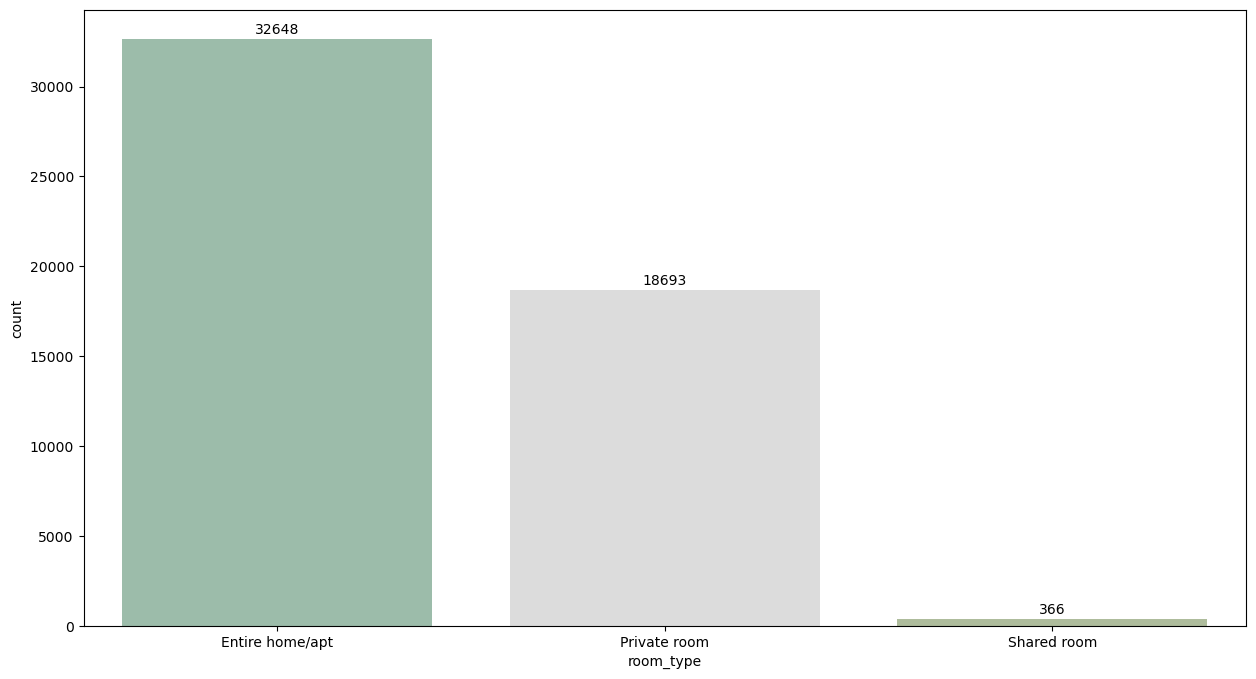

In [15]:
sns.countplot(df['room_type'].sort_values(), palette = colors)

for i,v in enumerate(df['room_type'].value_counts().sort_index()):
    plt.text(x = i , y = v + 300, s  = v , ha = 'center')

#### host_is_superhost

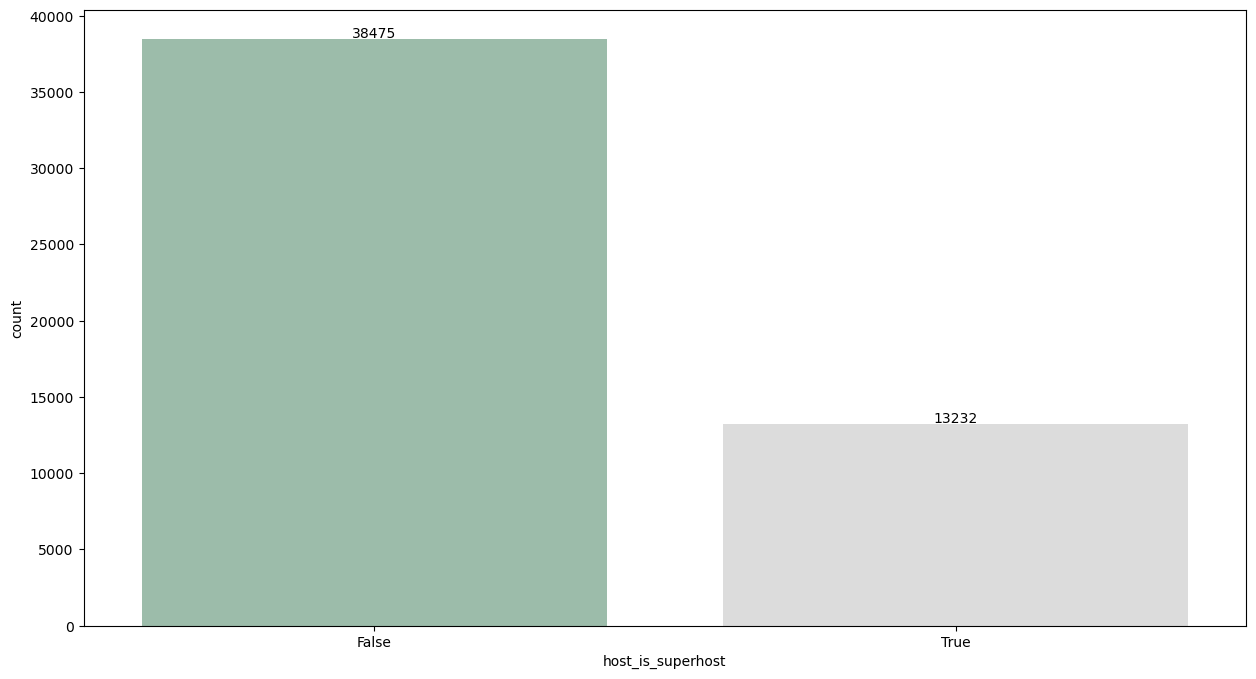

In [16]:
sns.countplot(df['host_is_superhost'].sort_values() , palette = colors)

for i,v in enumerate(df['host_is_superhost'].value_counts().sort_index()):
    plt.text(x = i , y = v + 100, s= v , ha = 'center')

#### cleanliness_rating

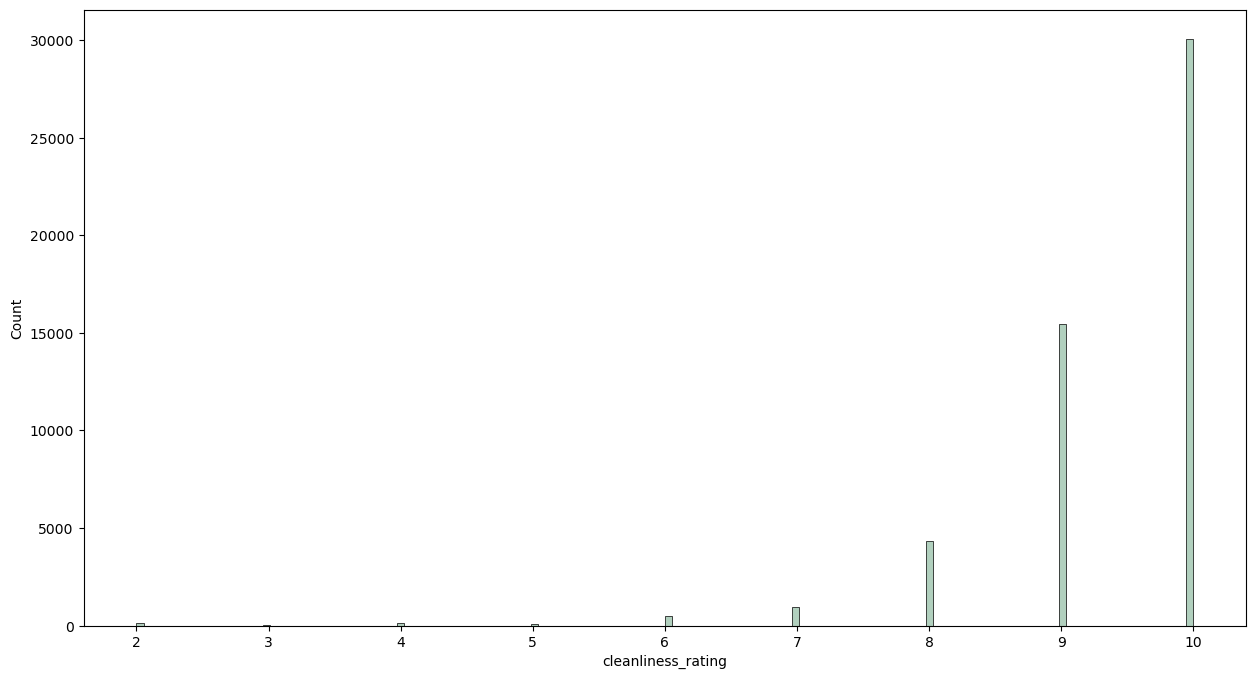

In [17]:
sns.histplot(df['cleanliness_rating'] , color = '#97C1A9')
plt.show()

#### Guest_satisfaction_overall

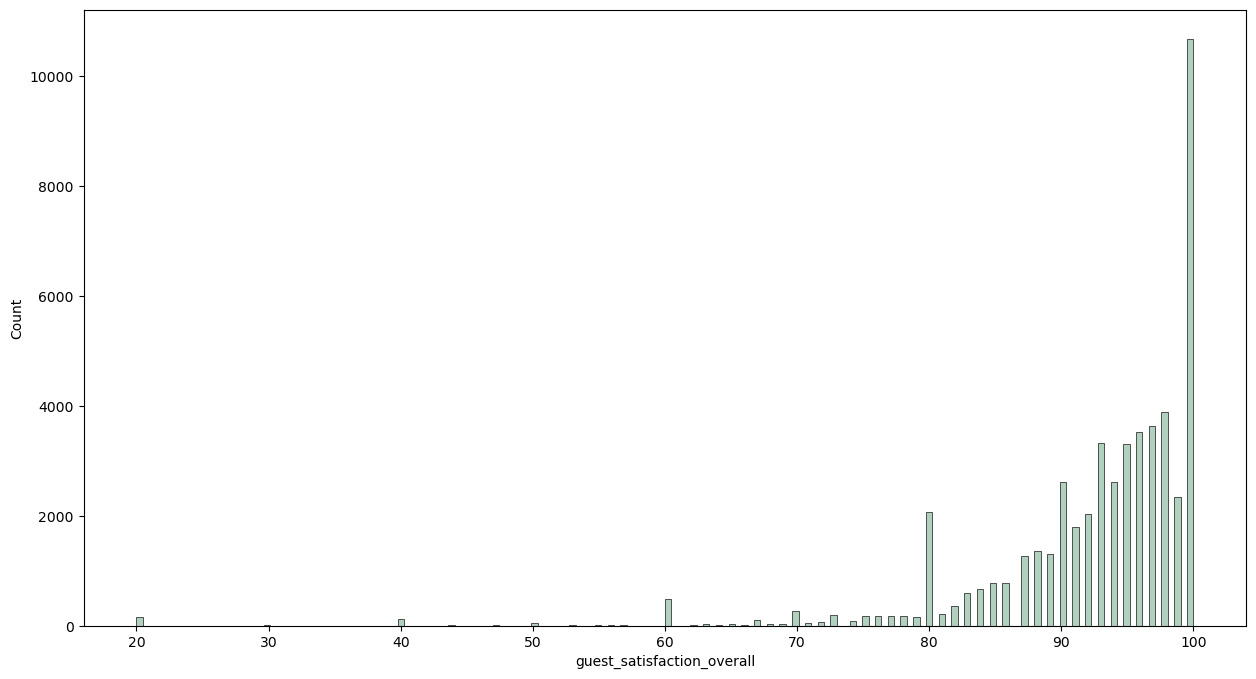

In [18]:
sns.histplot(df['guest_satisfaction_overall'] , color = '#97C1A9')
plt.show()

#### Bedrooms

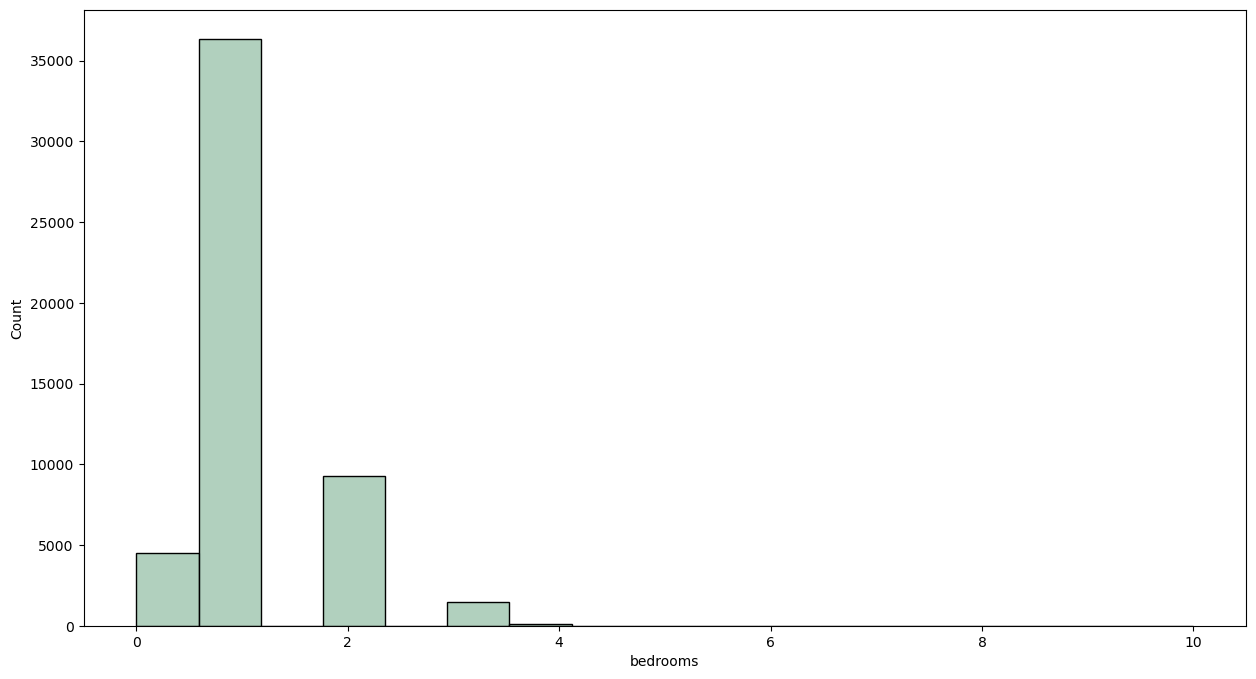

In [19]:
sns.histplot(df['bedrooms'] , color = '#97C1A9')
plt.show()

### Bivariate Analysis

#### City vs Price

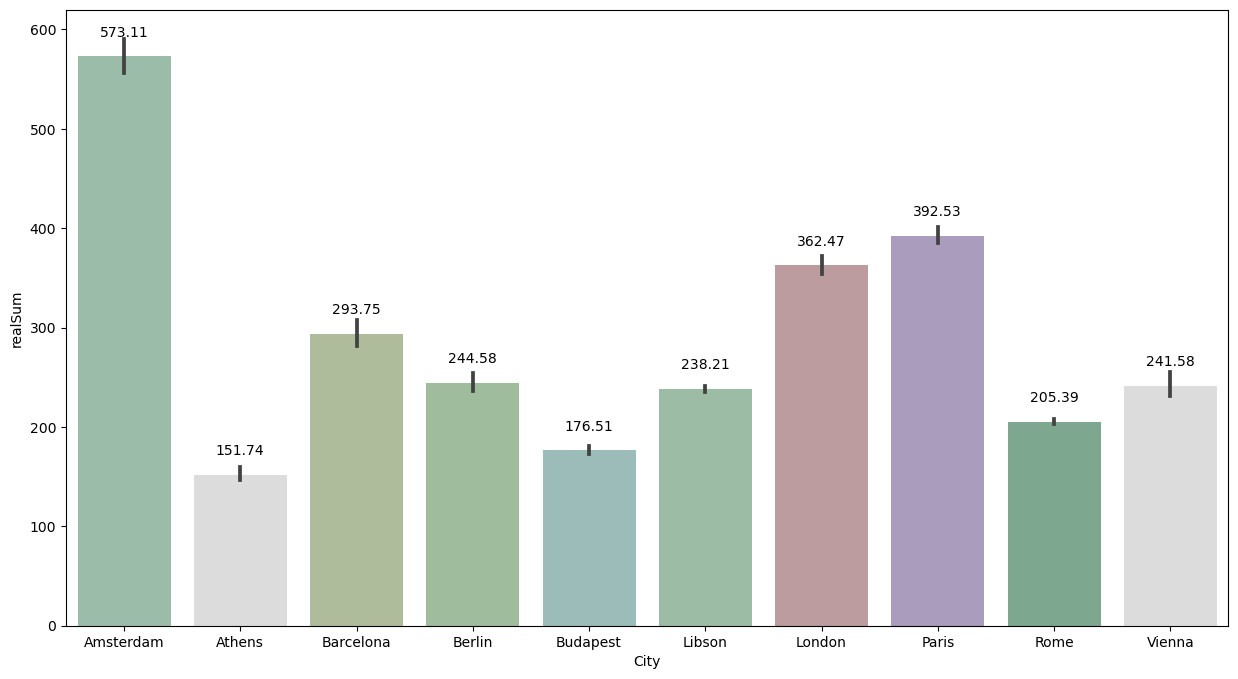

In [20]:
sns.barplot(df['City'].sort_values(),df['realSum'] , palette = colors)

for i,v in enumerate(df.groupby(by = 'City')['realSum'].mean()):
    plt.text(x = i, y = v + 20, s= round(v,2) , ha = 'center')

#### Day vs Price

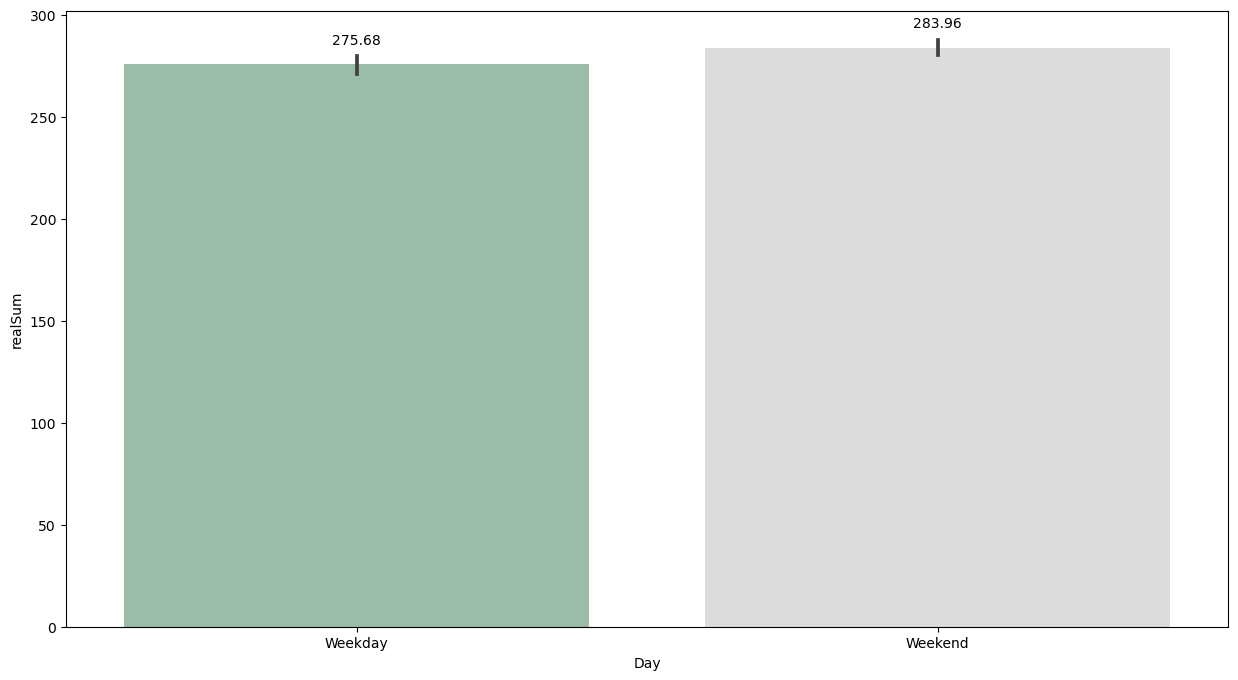

In [21]:
sns.barplot(df['Day'].sort_values(),df['realSum'],palette = colors)

for i,v in enumerate(df.groupby('Day')['realSum'].mean()):
    plt.text(x =i , y = v+10, s=round(v,2) , ha ='center')

#### Room_type vs Price

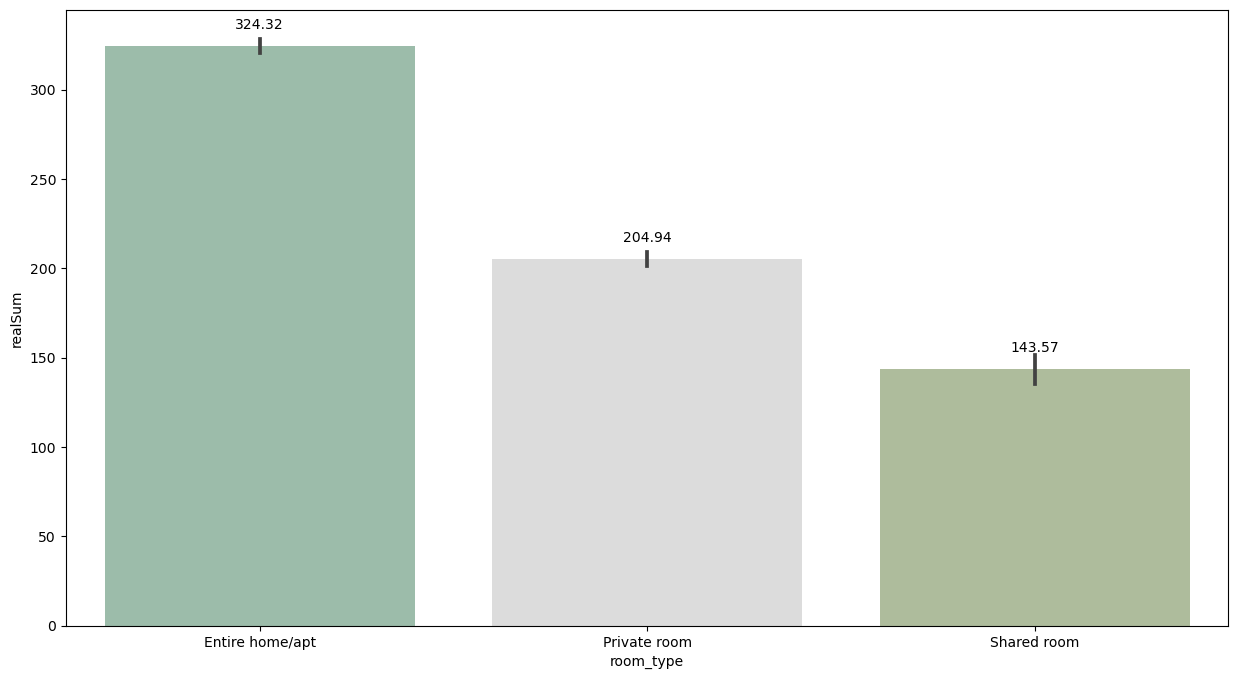

In [22]:
sns.barplot(df['room_type'].sort_values(),df['realSum'],palette=colors)

for i,v in enumerate(df.groupby('room_type')['realSum'].mean()):
    plt.text(x=i , y=v + 10, s= round(v,2) , ha='center')


#### Host_is_superhost vs Price

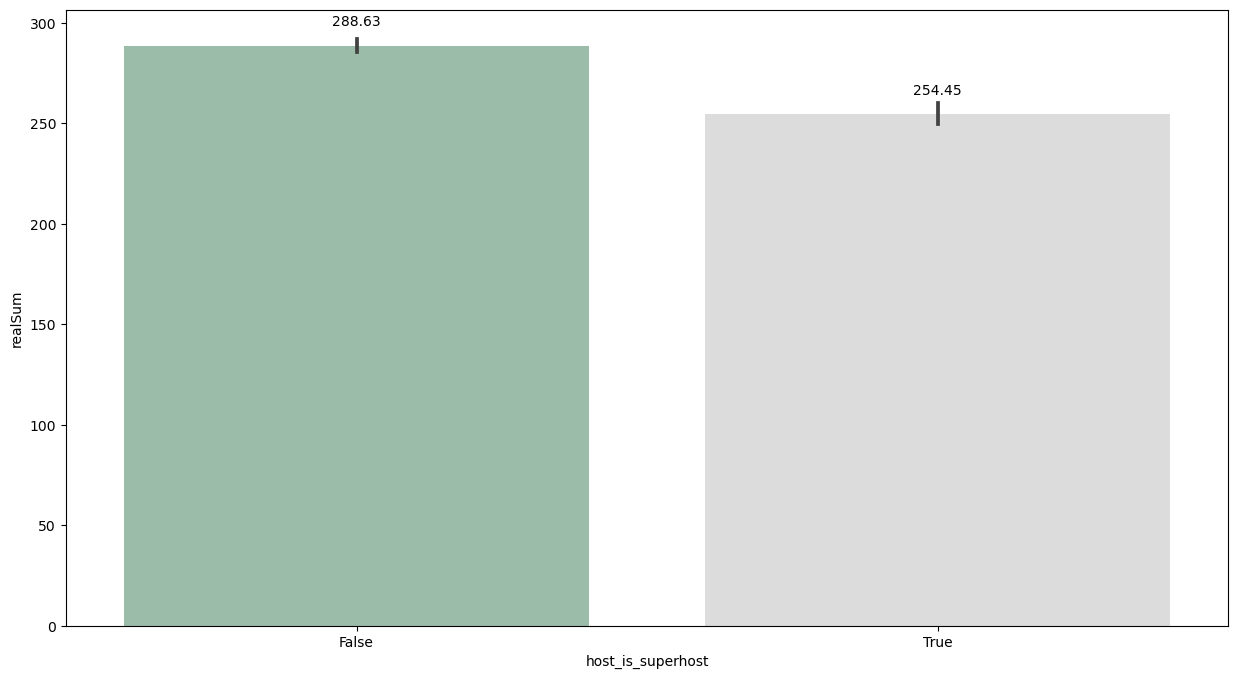

In [23]:
sns.barplot(df['host_is_superhost'],df['realSum'],palette=colors)

for i,v in enumerate(df.groupby('host_is_superhost')['realSum'].mean()):
    plt.text(x=i , y=v + 10 , s=round(v,2) , ha='center')

#### Cleanliness_rating vs Price

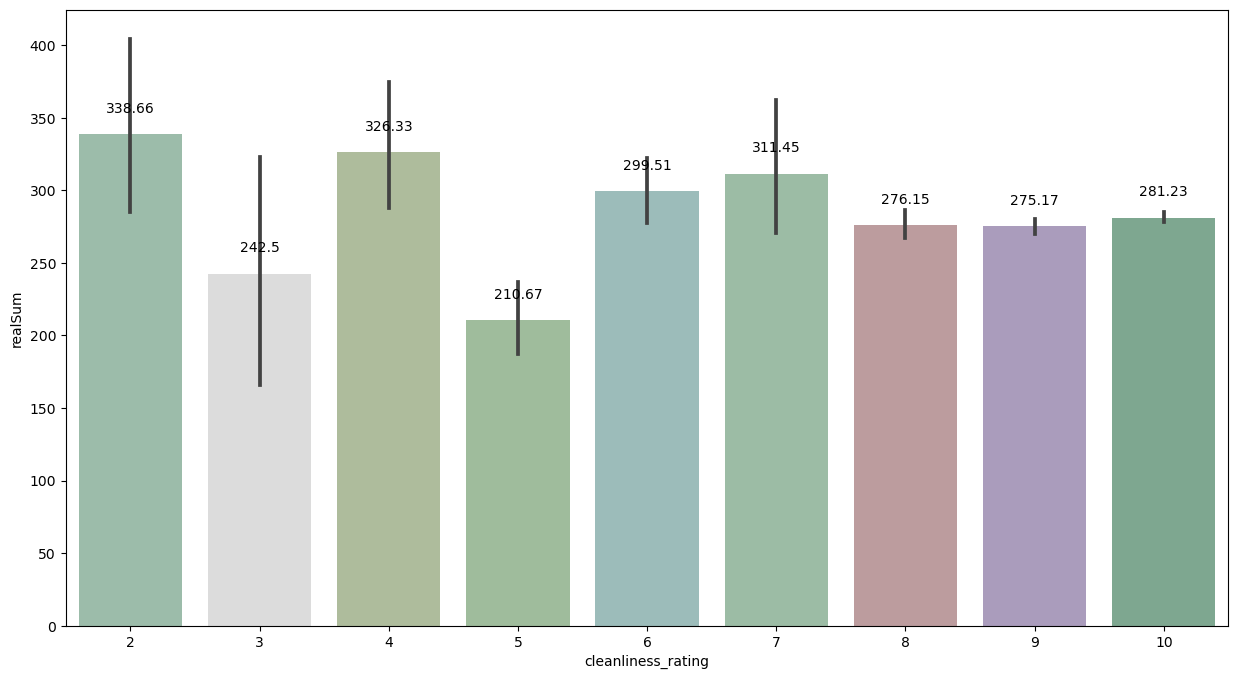

In [24]:
sns.barplot(df['cleanliness_rating'],df['realSum'],palette = colors)

for i,v in enumerate(df.groupby('cleanliness_rating')['realSum'].mean()):
    plt.text(x=i , y=v + 15, s=round(v,2), ha= 'center')

#### Bedrooms vs Price

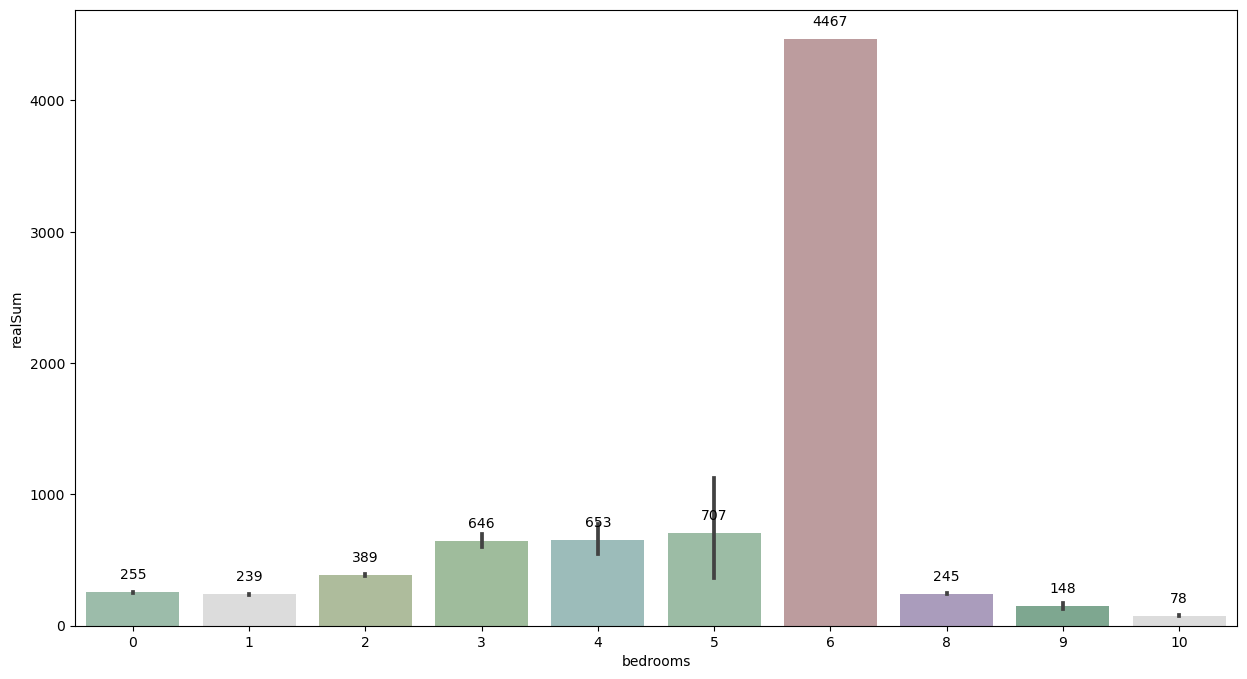

In [25]:
sns.barplot(df['bedrooms'],df['realSum'],palette=colors)

for i,v in enumerate(df.groupby('bedrooms')['realSum'].mean()):
    plt.text(x=i , y=v + 100, s=round(v) , ha='center')

### Mutivariate Analysis

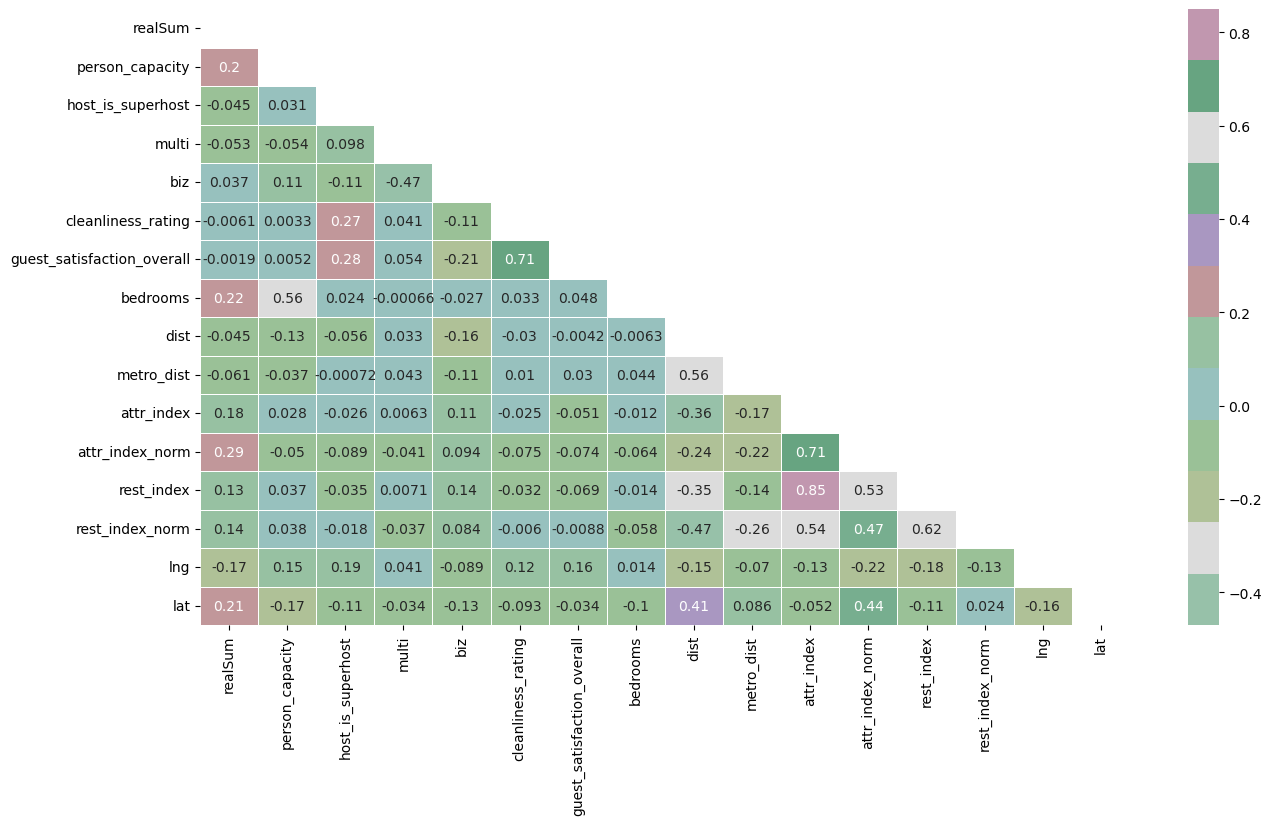

In [26]:
sns.heatmap(df.corr() , cmap = colors , mask = np.triu(df.corr()) , linewidth=0.5, annot = True)
plt.show()

### Feature Engineering

A new column named "Region" will be created by leveraging the latitude and longitude values of each city.

In [27]:
df['City'].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Libson',
       'London', 'Paris', 'Rome', 'Vienna'], dtype=object)

In [28]:
df_amsterdam = df[df['City'] == 'Amsterdam']
df_athens = df[df['City'] == 'Athens']
df_barcelona = df[df['City'] == 'Barcelona']
df_berlin = df[df['City'] == 'Berlin']
df_budapest = df[df['City'] == 'Budapest']
df_lisbon = df[df['City'] == 'Libson']
df_london = df[df['City'] == 'London']
df_paris = df[df['City'] == 'Paris']
df_rome = df[df['City'] == 'Rome']
df_vienna = df[df['City'] == 'Vienna']

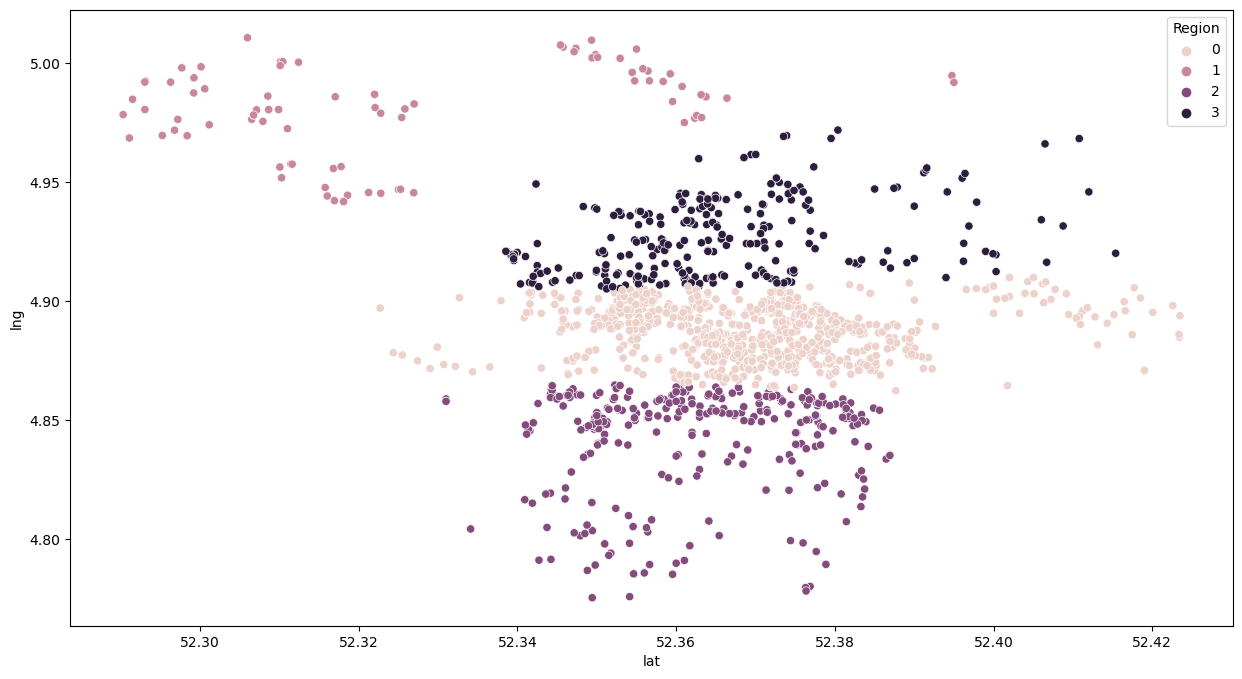

In [29]:
#Amsterdam
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_amsterdam[['lat','lng']])
lab=kmod.labels_
df_amsterdam['Region']=lab
sns.scatterplot(df_amsterdam['lat'],df_amsterdam['lng'],hue=df_amsterdam['Region'])
df_amsterdam['Region']=df_amsterdam['Region'].map({0:'West',1:'North',2:'South',3:'East'})

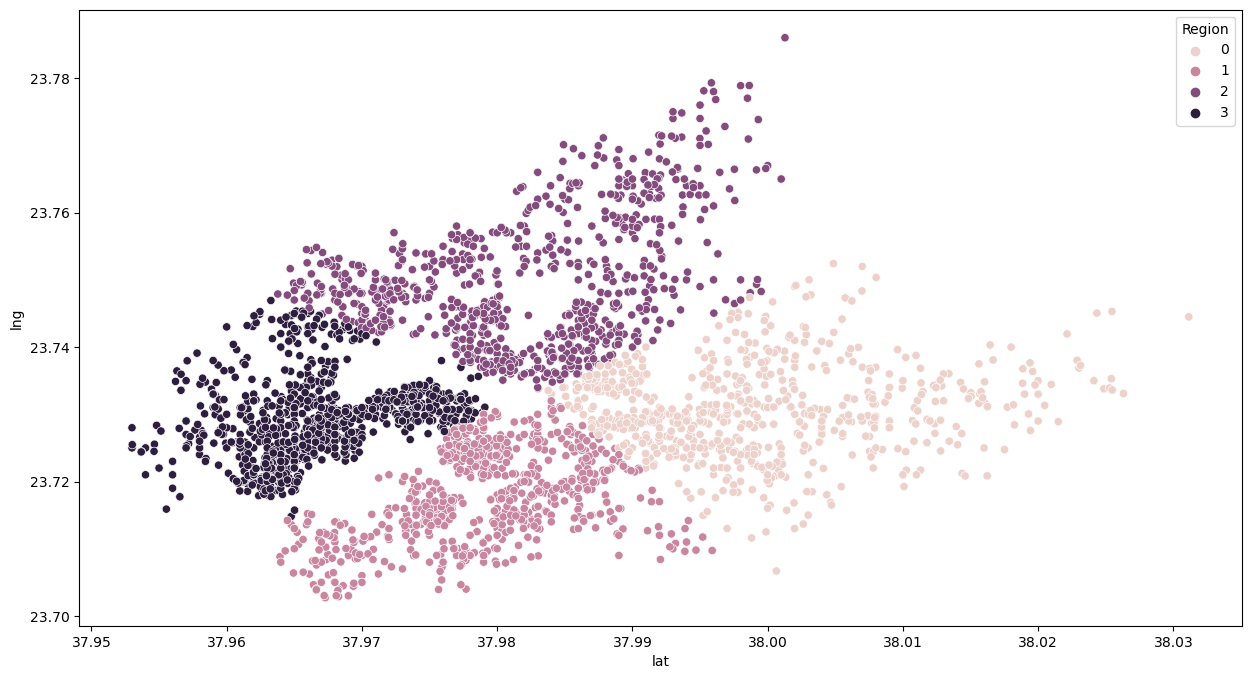

In [30]:
#Athens
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_athens[['lat','lng']])
lab=kmod.labels_
df_athens['Region']=lab
sns.scatterplot(df_athens['lat'],df_athens['lng'],hue=df_athens['Region'])
df_athens['Region']=df_athens['Region'].map({0:'West',1:'North',2:'South',3:'East'})

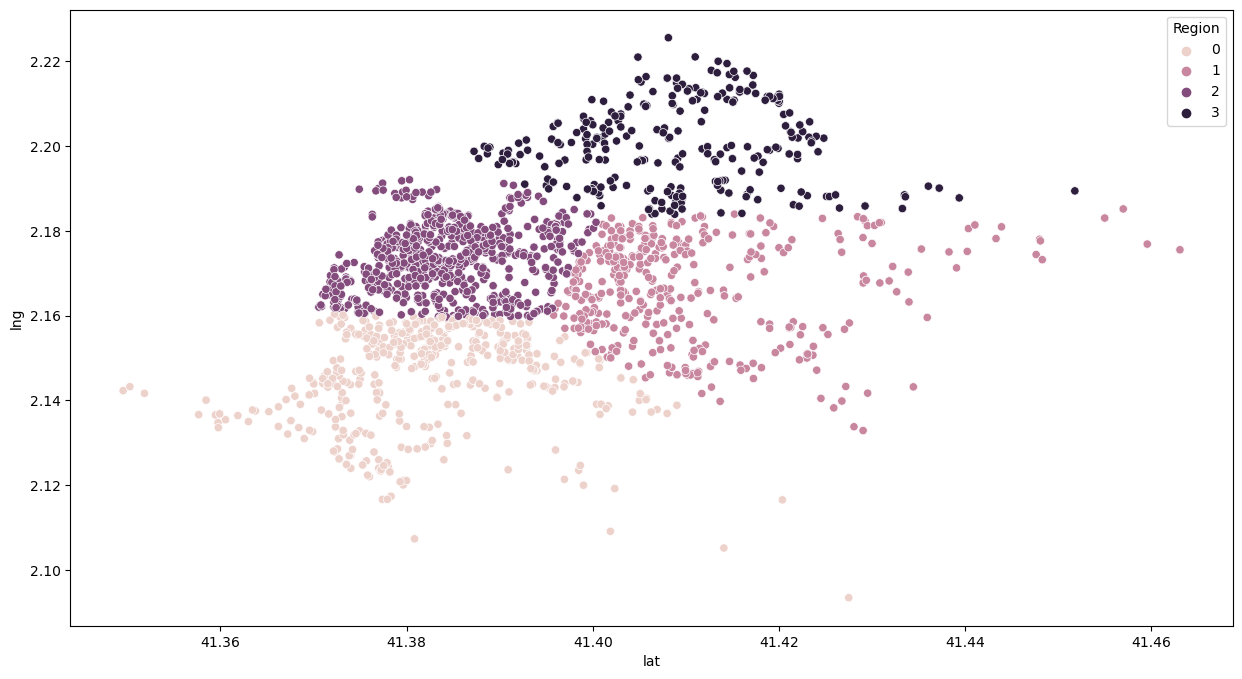

In [31]:
#Barcelona
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_barcelona[['lat','lng']])
lab=kmod.labels_
df_barcelona['Region']=lab
sns.scatterplot(df_barcelona['lat'],df_barcelona['lng'],hue=df_barcelona['Region'])
df_barcelona['Region']=df_barcelona['Region'].map({0:'West',1:'North',2:'South',3:'East'})

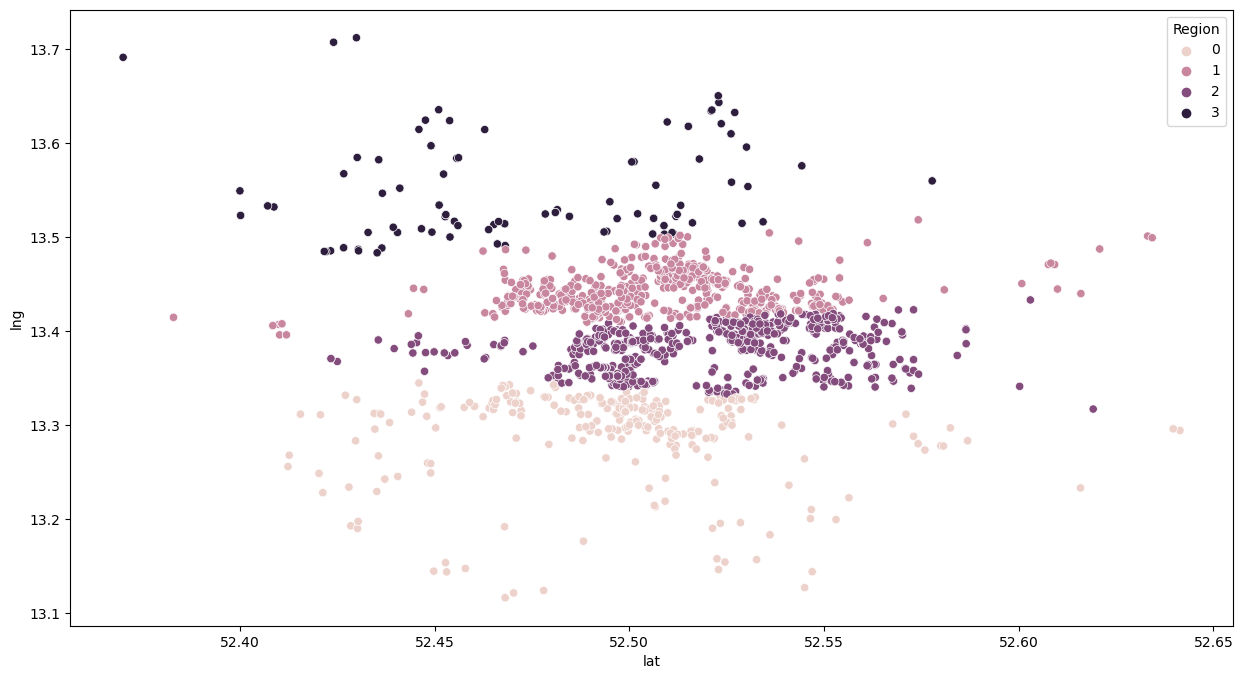

In [32]:
#Berlin
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_berlin[['lat','lng']])
lab=kmod.labels_
df_berlin['Region']=lab
sns.scatterplot(df_berlin['lat'],df_berlin['lng'],hue=df_berlin['Region'])
df_berlin['Region']=df_berlin['Region'].map({0:'West',1:'North',2:'South',3:'East'})

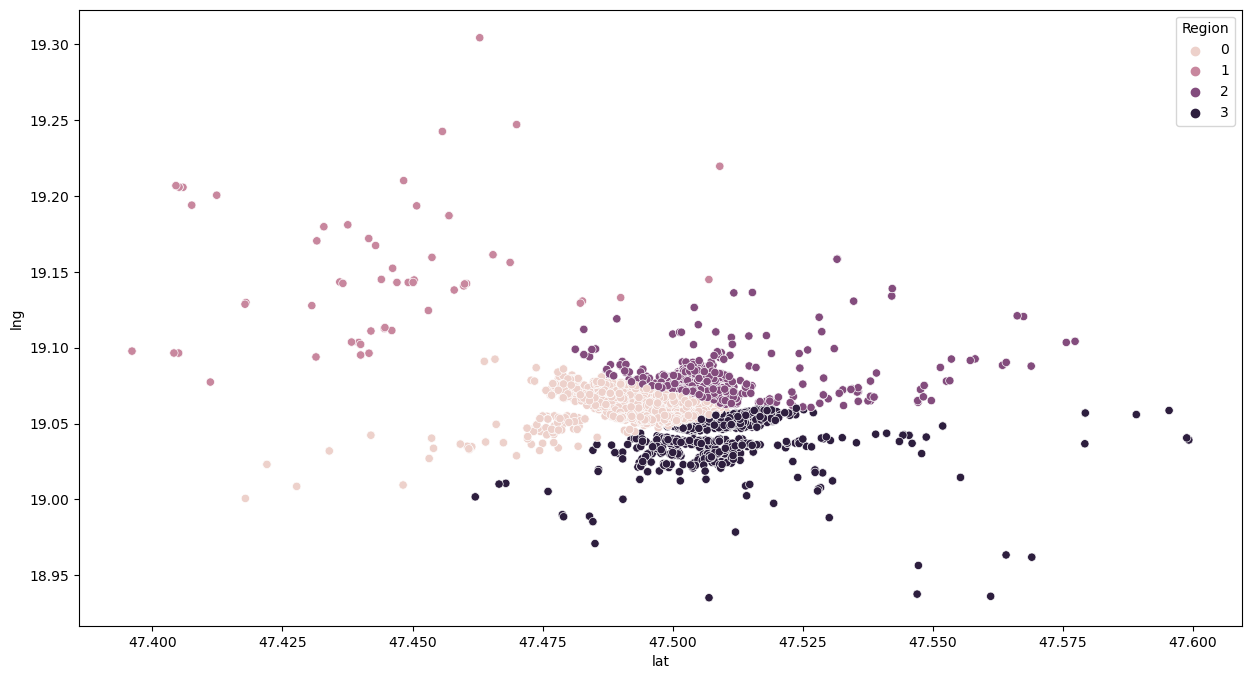

In [33]:
#Budapest
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_budapest[['lat','lng']])
lab=kmod.labels_
df_budapest['Region']=lab
sns.scatterplot(df_budapest['lat'],df_budapest['lng'],hue=df_budapest['Region'])
df_budapest['Region']=df_budapest['Region'].map({0:'West',1:'North',2:'South',3:'East'})

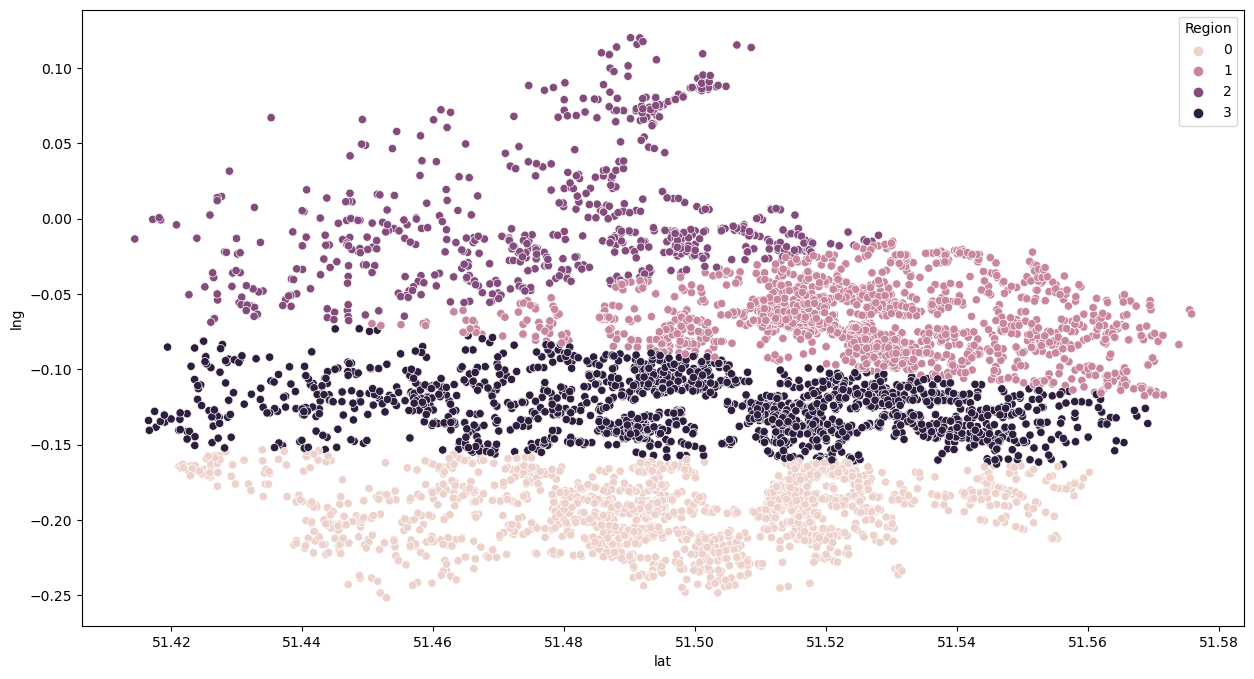

In [34]:
#London
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_london[['lat','lng']])
lab=kmod.labels_
df_london['Region']=lab
sns.scatterplot(df_london['lat'],df_london['lng'],hue=df_london['Region'])
df_london['Region']=df_london['Region'].map({0:'West',1:'North',2:'South',3:'East'})

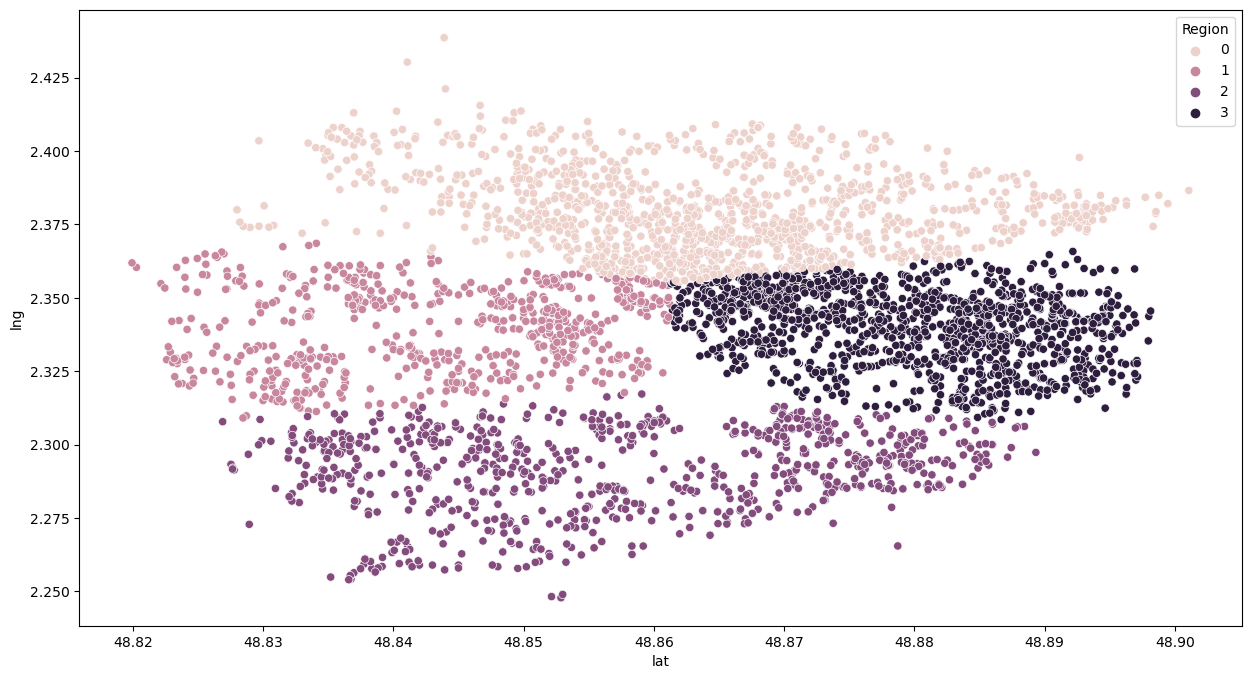

In [35]:
#Paris
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_paris[['lat','lng']])
lab=kmod.labels_
df_paris['Region']=lab
sns.scatterplot(df_paris['lat'],df_paris['lng'],hue=df_paris['Region'])
df_paris['Region']=df_paris['Region'].map({0:'West',1:'North',2:'South',3:'East'})

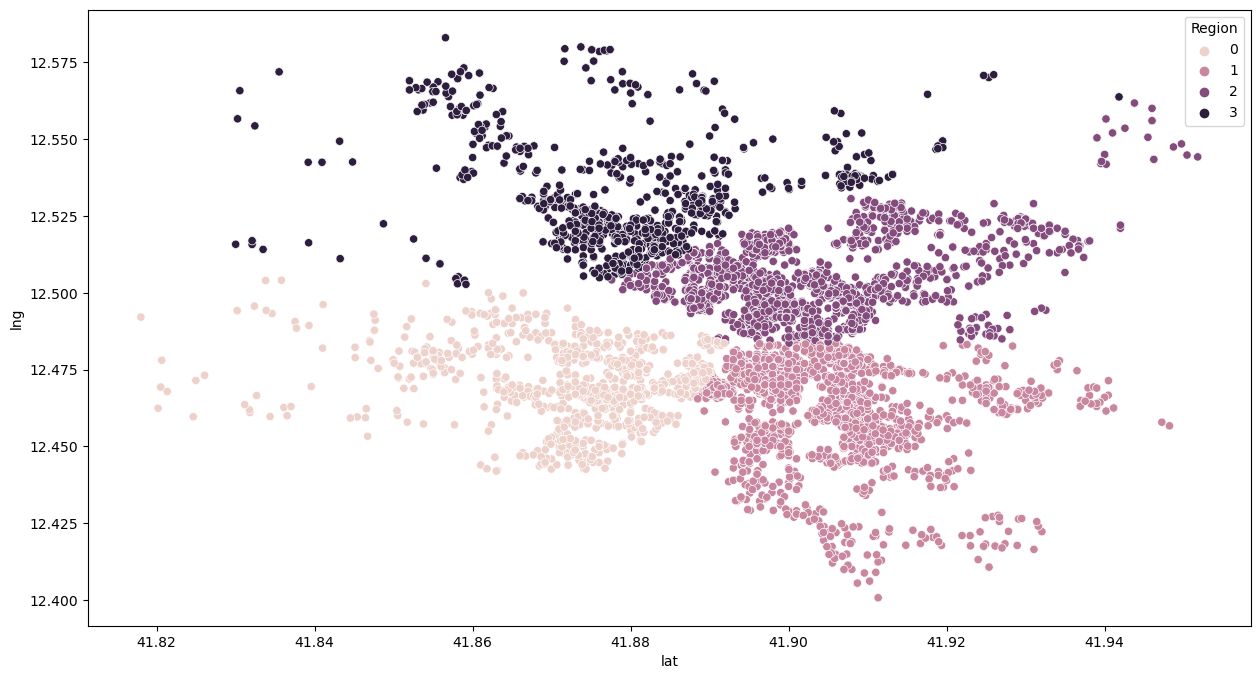

In [36]:
#Rome
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_rome[['lat','lng']])
lab=kmod.labels_
df_rome['Region']=lab
sns.scatterplot(df_rome['lat'],df_rome['lng'],hue=df_rome['Region'])
df_rome['Region']=df_rome['Region'].map({0:'West',1:'North',2:'South',3:'East'})

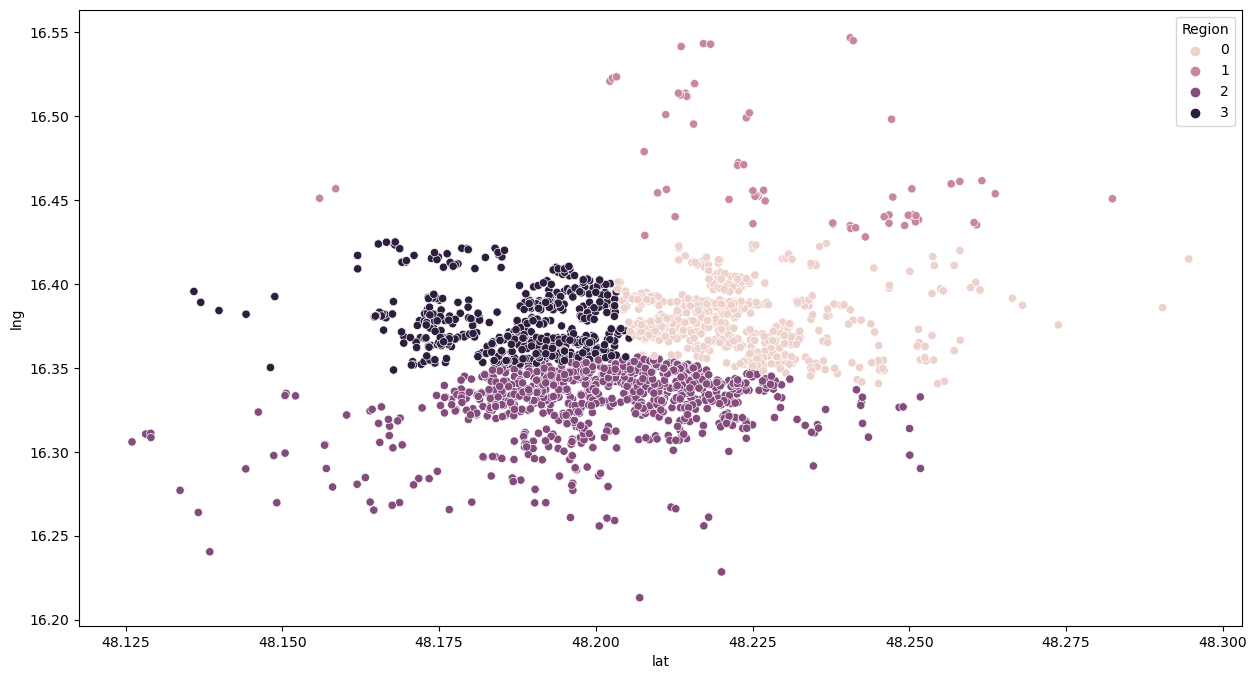

In [37]:
#Vienna
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_vienna[['lat','lng']])
lab=kmod.labels_
df_vienna['Region']=lab
sns.scatterplot(df_vienna['lat'],df_vienna['lng'],hue=df_vienna['Region'])
df_vienna['Region']=df_vienna['Region'].map({0:'West',1:'North',2:'South',3:'East'})

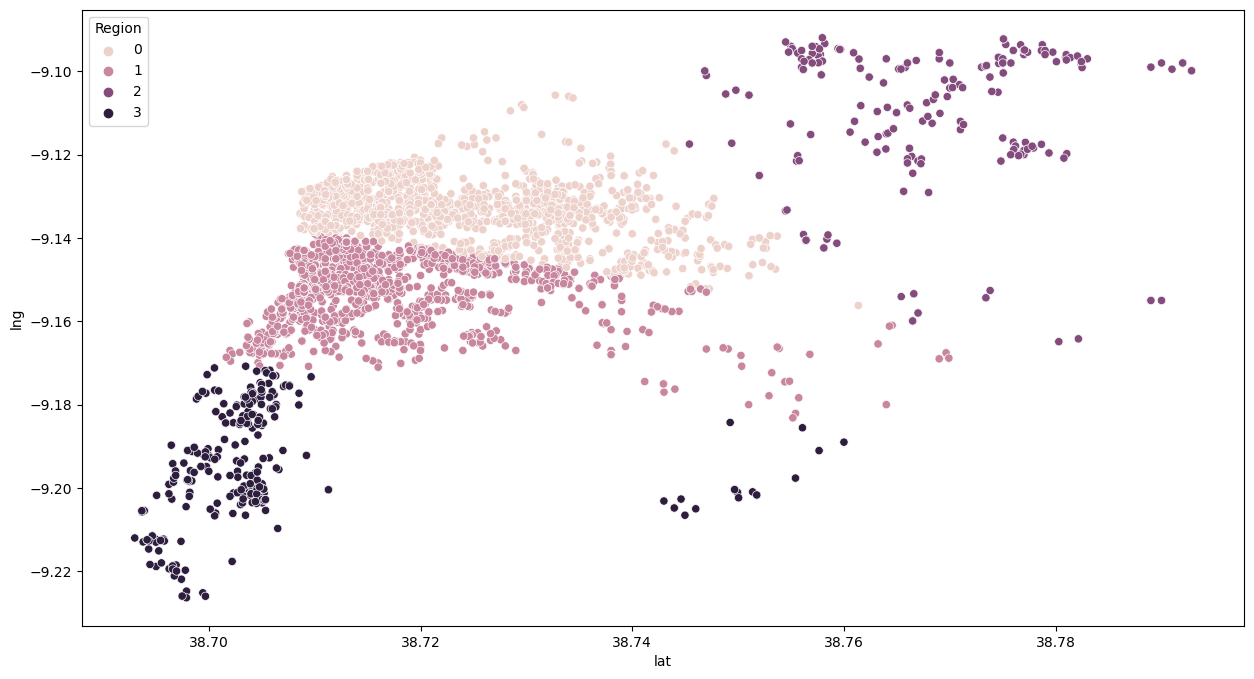

In [38]:
#Lisbon
km=KMeans(n_clusters=4, init='k-means++',random_state=20)
kmod=km.fit(df_lisbon[['lat','lng']])
lab=kmod.labels_
df_lisbon['Region']=lab
sns.scatterplot(df_lisbon['lat'],df_lisbon['lng'],hue=df_lisbon['Region'])
df_lisbon['Region']=df_lisbon['Region'].map({0:'West',1:'North',2:'South',3:'East'})

In [39]:
df = pd.concat([df_amsterdam,df_athens,df_barcelona,df_berlin,df_budapest,df_lisbon,df_london,df_paris,df_rome,df_vienna])

df.head()

City      Day     realSum     room_type  person_capacity  \
0  Amsterdam  Weekday  194.033698  Private room                2   
1  Amsterdam  Weekday  344.245776  Private room                4   
2  Amsterdam  Weekday  264.101422  Private room                2   
3  Amsterdam  Weekday  433.529398  Private room                4   
4  Amsterdam  Weekday  485.552926  Private room                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                  10   
1              False      0    0                   8   
2              False      0    1                   9   
3              False      0    1                   9   
4               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    2.539380   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    3.651621   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat Region  
0         4.166708   98.253896         6.846473  4.90569  52.41772   West  
1        33.421209  837.280757        58.342928  4.90005  52.37432   West  
2         3.985908   95.386955         6.646700  4.97512  52.36103  North  
3        26.119108  875.033098        60.973565  4.89417  52.37663   West  
4        29.272733  815.305740        56.811677  4.90051  52.37508   West

In [40]:
df['Region'].isnull().sum()

0

Dropping of individual latitude and longitude columns

In [41]:
df.drop(columns = ['lat','lng'],inplace = True)

Performing bining for guest satisfaction column. Creating 3 discrete bins namely score between 0-35 as poor , 36 - 70 as average and 71 - 100 as high

In [42]:
def binning(l):
    if l > 0 and l <= 35 :
        return 'Poor'
    elif l > 36 and l <= 70:
        return 'Average'
    else:
        return 'High'
    
df['guest_satisfaction_overall'] = df['guest_satisfaction_overall'].apply(binning)

### Performing hypothesis testing to find the significant variables

Hypothesis :

H0 : There is no significant relationship between the dependent and independent variable

Ha : There is significant relationship between the dependent and independent variable

Significance level :

Considering significance level as 0.05

In [43]:
# Creating a dataframe to store the results of statistical results

statistical_result = pd.DataFrame(columns = ['Column','Pvalue','Remarks'])

In [44]:
num_cols = ['dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm','attr_index','rest_index']
cat_cols = ['City', 'Day', 'room_type', 'person_capacity','host_is_superhost', 'cleanliness_rating', 
            'guest_satisfaction_overall','bedrooms','Region']

In [45]:
# Numerical vs Categorical - f_oneway test

for i in cat_cols:
    groups =  [df.loc[df[i] == subclass , 'realSum'] for subclass 
              in df[i].unique()]
    
    stat , pval = stats.f_oneway(*groups)
    
    statistical_result = statistical_result.append({'Column':i , 'Pvalue':pval,
                                                   'Remarks':'Reject H0' if pval <= 0.05 else 'Failed to reject H0'},
                                                  ignore_index=True)

In [46]:
# Numerical vs Numerical - Pearsonr test

for i in num_cols:
    stat , pval = stats.pearsonr(df[i],df['realSum'])
    
    statistical_result = statistical_result.append({'Column':i , 'Pvalue':pval,
                                                   'Remarks':'Reject H0' if pval <= 0.05 else 'Failed to reject H0'},
                                                  ignore_index=True)

In [47]:
statistical_result

Column         Pvalue    Remarks
0                         City   0.000000e+00  Reject H0
1                          Day   4.090175e-03  Reject H0
2                    room_type   0.000000e+00  Reject H0
3              person_capacity   0.000000e+00  Reject H0
4            host_is_superhost   4.345181e-25  Reject H0
5           cleanliness_rating   9.461615e-04  Reject H0
6   guest_satisfaction_overall   5.707492e-04  Reject H0
7                     bedrooms   0.000000e+00  Reject H0
8                       Region   3.958731e-33  Reject H0
9                         dist   2.563113e-24  Reject H0
10                  metro_dist   7.376494e-44  Reject H0
11             attr_index_norm   0.000000e+00  Reject H0
12             rest_index_norm  6.507204e-238  Reject H0
13                  attr_index   0.000000e+00  Reject H0
14                  rest_index  5.763826e-208  Reject H0

### Insights from statistical test

After performing statistical tests, all variables were found to be statistically significant. This suggests that each variable examined in the study has a meaningful relationship with the outcome. These findings indicate the importance of all variables in influencing the price variable.

### Splitting the dataset randomly into train and test dataset using ratio of 70:30

In [48]:
x = df.drop(columns = 'realSum')
y = df['realSum']

xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.30 , random_state = 24)

### Transforming of target variable

In [49]:
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

In [50]:
pt = PowerTransformer()

var = pt.fit(ytrain)
ytrain = var.transform(ytrain)
ytest = var.transform(ytest)

### Encoding of Categorical variables

For columns like city , room_type , region CatBoost Encoding technique can be used

In [51]:
catboost_columns = ['City','room_type','Region']

for i in catboost_columns:
    
    var_city = CatBoostEncoder().fit(xtrain[i],ytrain)

    xtrain[i] = var_city.transform(xtrain[i])
    xtest[i] = var_city.transform(xtest[i])

For columns like day , host_is_superhost and guest_satisfaction we can replace with 0 and 1

In [52]:
xtrain['Day'].replace({'Weekend':1,'Weekday':0},inplace=True)
xtest['Day'].replace({'Weekend':1,'Weekday':0},inplace=True)

xtrain['host_is_superhost'].replace({True:1,False:0},inplace=True)
xtest['host_is_superhost'].replace({True:1,False:0},inplace=True)

xtrain['guest_satisfaction_overall'].replace({'High':2,'Average':1,'Poor':0},inplace = True)
xtest['guest_satisfaction_overall'].replace({'High':2,'Average':1,'Poor':0},inplace = True)

### Checking and treating of outliers

#### For training data

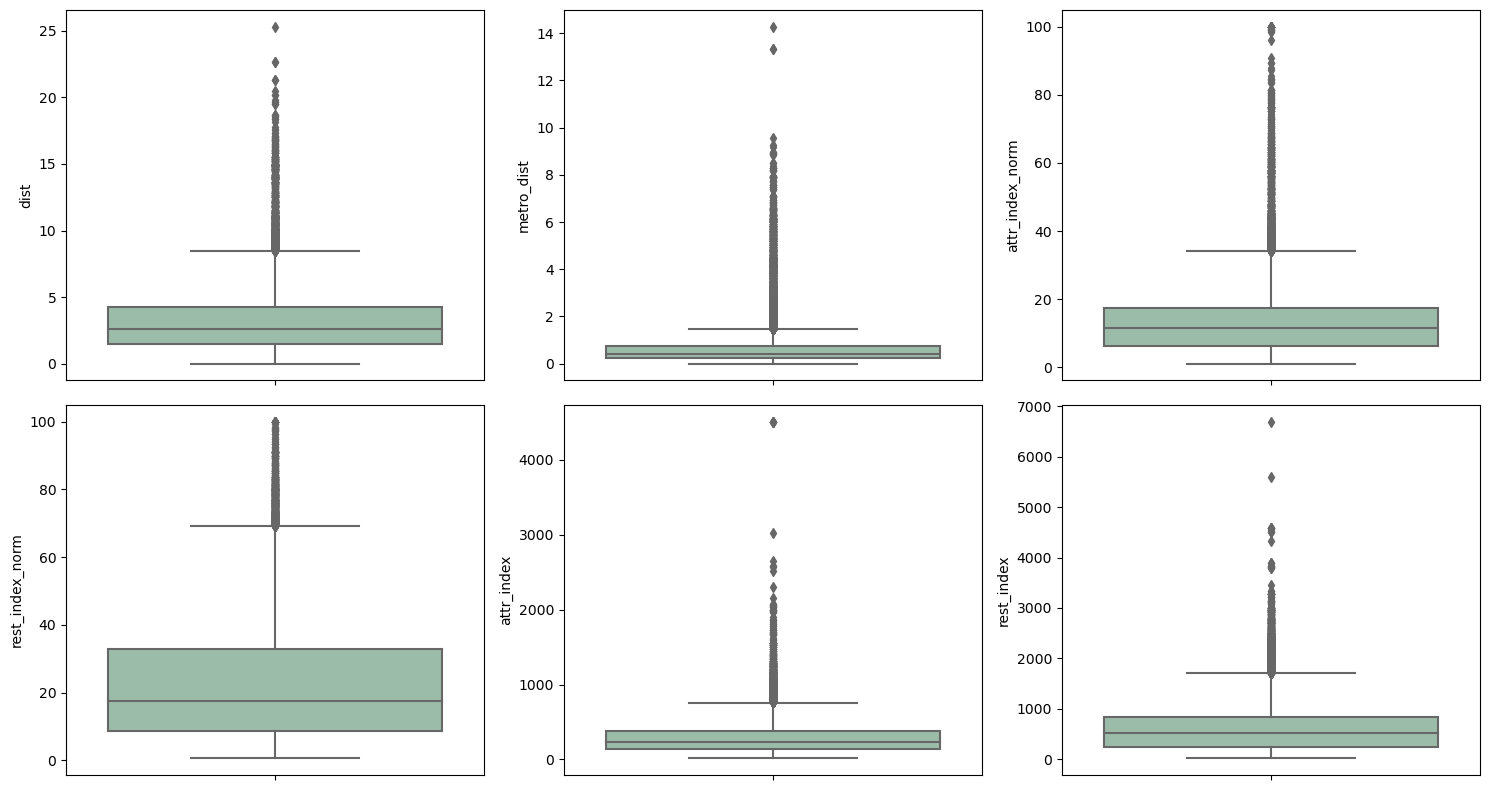

In [53]:
f,ax = plt.subplots(2,3)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtrain[i] , ax = v , palette = colors)
    
plt.tight_layout()
plt.show()

#### For testing data

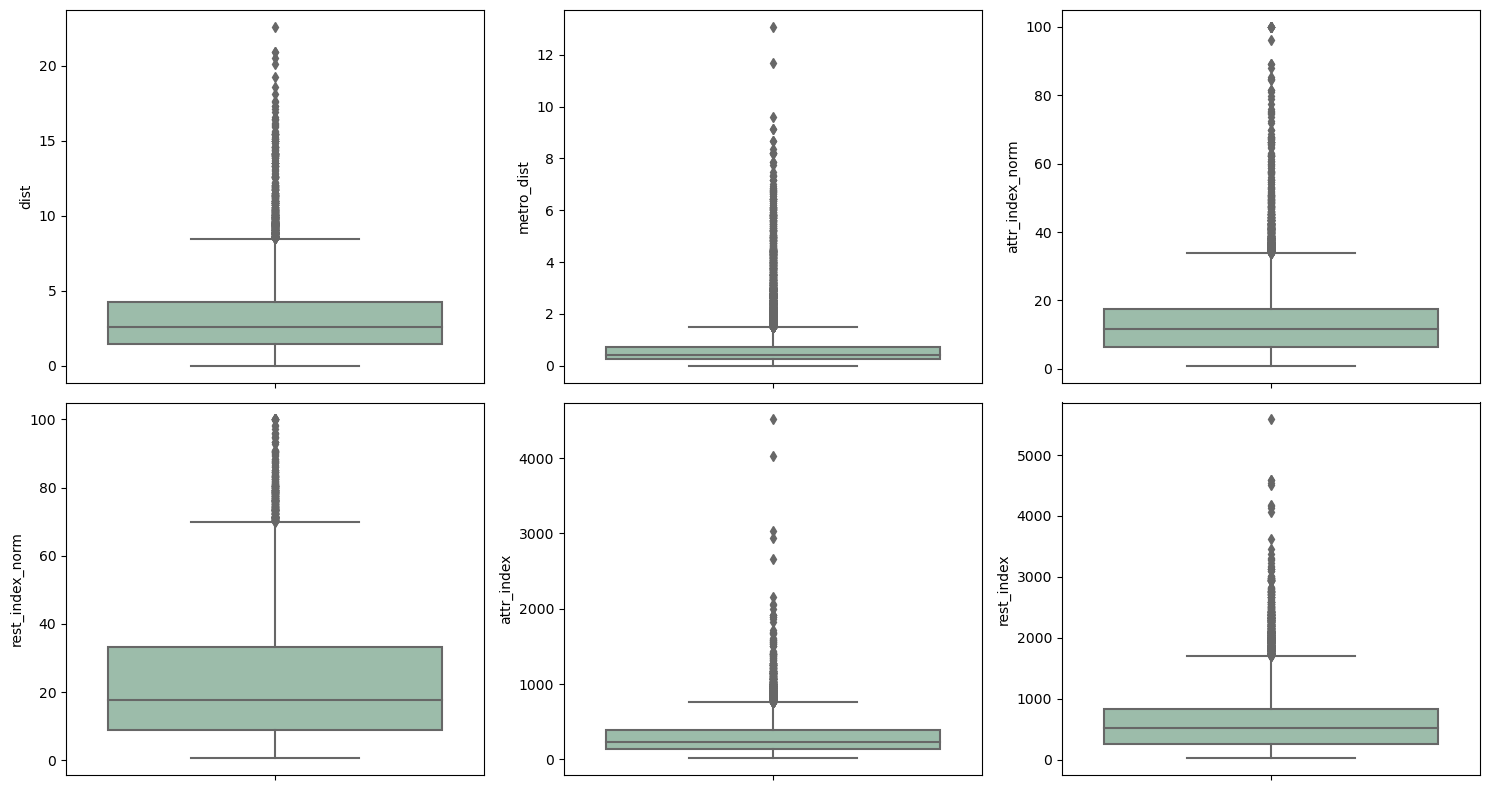

In [54]:
f,ax = plt.subplots(2,3)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtest[i] , ax = v, palette = colors)
    
plt.tight_layout()
plt.show()

From above box plots it is clearly evident that there are outliers . By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [55]:
pt = PowerTransformer()

for i in num_cols:
    var = pt.fit(xtrain[[i]])
    
    xtrain[i] = var.transform(xtrain[[i]])
    xtest[i] = var.transform(xtest[[i]])

#### After treating outliers

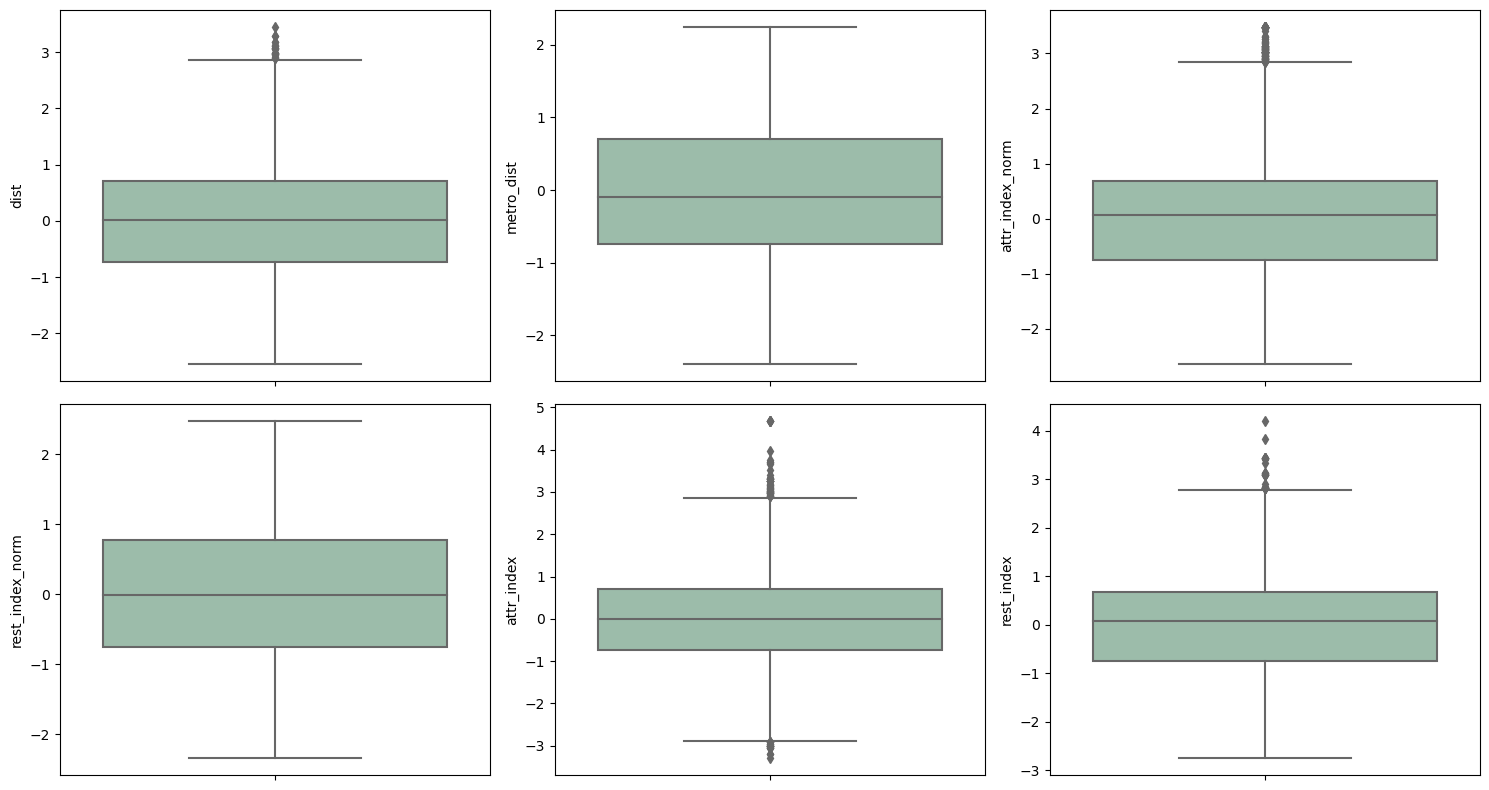

In [56]:
f,ax = plt.subplots(2,3)

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y = xtrain[i] , ax = v , palette = colors)
    
plt.tight_layout()
plt.show()

### Building a Base Model

Building a base model using Linear Regression as it is having the highest explanatory power compared to other models

In [57]:
xtrain

City  Day  room_type  person_capacity  host_is_superhost  multi  \
31733  0.370252    1   0.255588                2                  0      0   
6108  -0.974896    1   0.255588                3                  1      1   
50254 -0.058587    1   0.255588                4                  1      0   
17082 -0.019765    0   0.255588                4                  0      0   
26349  0.370252    0   0.255588                4                  0      0   
...         ...  ...        ...              ...                ...    ...   
21633 -0.019765    1   0.255588                4                  0      0   
19857 -0.019765    1   0.255588                3                  0      0   
14528 -0.612586    0   0.255588                4                  1      0   
899    1.185099    0   0.255588                4                  0      0   
45474 -0.315801    1   0.255588                4                  0      0   

       biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
31733    0                   8                           2         1   
6108     0                  10                           2         1   
50254    0                  10                           2         1   
17082    1                   9                           2         1   
26349    1                   7                           1         1   
...    ...                 ...                         ...       ...   
21633    1                  10                           2         1   
19857    1                  10                           2         1   
14528    1                  10                           2         1   
899      0                  10                           2         2   
45474    1                   9                           2         2   

           dist  metro_dist  attr_index  attr_index_norm  rest_index  \
31733  1.558951    1.693711   -0.606800        -0.069608   -0.446957   
6108  -0.912802    0.382449   -0.956673        -1.236919   -1.237761   
50254  0.605870    0.952535   -1.766019        -1.244760   -1.726974   
17082 -1.275237    0.376266    0.783126         0.302589    0.641928   
26349 -1.209183   -0.269746    1.544790         2.243195    1.833495   
...         ...         ...         ...              ...         ...   
21633 -0.635527    1.189612   -0.667894        -1.127526   -0.055491   
19857 -1.642615   -0.386063    0.932150         0.451322    0.547815   
14528 -1.222193   -0.496587    0.036426         0.396181    0.255403   
899    0.273717    0.431224   -0.462081        -0.298385   -0.909977   
45474  0.235467    1.396986    0.322391        -0.704232    0.483463   

       rest_index_norm    Region  
31733        -1.102740  0.087943  
6108         -1.799038 -0.151284  
50254        -1.845516  0.016945  
17082         0.910647  0.016945  
26349         0.777961  0.087943  
...                ...       ...  
21633         0.477258  0.038198  
19857         1.131183  0.016945  
14528         1.231597  0.016945  
899          -0.203069  0.087943  
45474        -0.138603  0.038198  

[36194 rows x 17 columns]

In [58]:
model_lr = sma.OLS(ytrain,sma.add_constant(xtrain)).fit()

model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     4170.
Date:                Sun, 30 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:53:31   Log-Likelihood:                -31721.
No. Observations:               36194   AIC:                         6.348e+04
Df Residuals:                   36176   BIC:                         6.363e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.2840      0.039    -33.172      0.000      -1.360      -1.208
City                           1.0144      0.008    135.069      0.000       1.000       1.029
Day                            0.0417      0.006      6.766      0.000       0.030       0.054
room_type                      0.9831      0.011     91.493      0.000       0.962       1.004
person_capacity                0.1440      0.003     43.655      0.000       0.138       0.150
host_is_superhost              0.0347      0.007      4.658      0.000       0.020       0.049
multi                          0.0760      0.008      9.707      0.000       0.061       0.091
biz                            0.1838      0.008     23.842      0.000       0.169       0.199
cleanliness_rating             0.1089      0.004     28.447      0.000       0.101       0.116
guest_satisfaction_overall    -0.3027      0.019    -15.892      0.000      -0.340      -0.265
bedrooms                       0.2466      0.006     40.590      0.000       0.235       0.258
dist                          -0.0403      0.004     -9.021      0.000      -0.049      -0.032
metro_dist                     0.0144      0.003      4.229      0.000       0.008       0.021
attr_index                    -0.0166      0.012     -1.376      0.169      -0.040       0.007
attr_index_norm                0.3034      0.006     49.206      0.000       0.291       0.315
rest_index                     0.0380      0.010      3.705      0.000       0.018       0.058
rest_index_norm               -0.0211      0.005     -4.208      0.000      -0.031      -0.011
Region                        -0.1426      0.036     -3.918      0.000      -0.214      -0.071
==============================================================================
Omnibus:                     2811.223   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7807.113
Skew:                           0.433   Prob(JB):                         0.00
Kurtosis:                       5.104   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
pred_train = model_lr.predict(sma.add_constant(xtrain))
pred_test = model_lr.predict(sma.add_constant(xtest))

r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)
rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,pred_test))
mape_train = mean_absolute_percentage_error(ytrain,pred_train)
mape_test = mean_absolute_percentage_error(ytest,pred_test)

In [60]:
# Creating a dataframe to store values of metrics of both train and test data

performance_df = pd.DataFrame(columns = ['Model_Name','Train R2','Test R2','Train RMSE','Test RMSE'
                                         ,'Train MAPE','Test MAPE','Remarks'])

performance_df

Empty DataFrame
Columns: [Model_Name, Train R2, Test R2, Train RMSE, Test RMSE, Train MAPE, Test MAPE, Remarks]
Index: []

In [61]:
# Appending values of our base model to performance df

performance_df = performance_df.append({'Model_Name':'Base Model','Train R2':r2_train,'Test R2':r2_test,
                                       'Train RMSE':rmse_train,'Test RMSE':rmse_test,'Train MAPE':mape_train,
                                       'Test MAPE':mape_test,'Remarks':'Base'},ignore_index=True)

performance_df

Model_Name  Train R2   Test R2  Train RMSE  Test RMSE  Train MAPE  \
0  Base Model   0.66211  0.653968    0.581283   0.584654   56.088907   

   Test MAPE Remarks  
0  18.944154    Base

### Building different models and evaluating using appropriate technique

In [62]:
# Creating a user defined function to store values of metrics to the dataframe

def model_performance(model , name):
    global performance_df
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    r2_train = r2_score(ytrain,pred_train)
    r2_test = r2_score(ytest,pred_test)
    rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test = np.sqrt(mean_squared_error(ytest,pred_test))
    mape_train = mean_absolute_percentage_error(ytrain,pred_train)
    mape_test = mean_absolute_percentage_error(ytest,pred_test)
    
    # Defining a function for remarks
    
    def remarks(train,test):
        if abs(train - test) > 0.1 or train > 0.90:
            return 'Over Fit'
        elif train > 0.5 and test > 0.5:
            return 'Good Fit'
        else :
            return 'Under Fit'
    
    performance_df = performance_df.append({'Model_Name':name,'Train R2':r2_train,'Test R2':r2_test,'Train RMSE':rmse_train,
                                          'Test RMSE':rmse_test,'Train MAPE':mape_train,'Test MAPE':mape_test,
                                           'Remarks':remarks(r2_train,r2_test)},ignore_index = True)

In [63]:
# Creating a user defined function to highlight the rows which are good fit

def highlight_row(df):
    color_green = ['background-color : #97C1A9']*len(df)
    color_white = ['background-color : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    else:
        return color_white

#### Decision Tree Model

In [64]:
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)

model_performance(model_dt,'Decision Tree')

#### Random Forest Model

In [65]:
model_rf = RandomForestRegressor().fit(xtrain,ytrain)

model_performance(model_rf,'Random Forest')

#### KNN

In [66]:
model_knn = KNeighborsRegressor().fit(xtrain,ytrain)

model_performance(model_knn, 'KNN')

#### AdaBoost

In [67]:
model_ab = AdaBoostRegressor().fit(xtrain,ytrain)

model_performance(model_ab,'AdaBoost')

#### Gradient Boosting

In [68]:
model_gb = GradientBoostingRegressor().fit(xtrain,ytrain)

model_performance(model_gb , 'Gradient Boosting')

#### XGBoost

In [69]:
model_xgb = XGBRegressor().fit(xtrain,ytrain)

model_performance(model_xgb, 'XGBoost')

#### Neural Network

In [70]:
model_nn = MLPRegressor().fit(xtrain,ytrain)

model_performance(model_nn, 'Neural Network')

#### CatBoost

In [71]:
model_cb = CatBoostRegressor().fit(xtrain,ytrain)

model_performance(model_cb, 'CatBoost')

Learning rate set to 0.072185
0:	learn: 0.9579867	total: 154ms	remaining: 2m 33s
1:	learn: 0.9195192	total: 159ms	remaining: 1m 19s
2:	learn: 0.8860296	total: 164ms	remaining: 54.5s
3:	learn: 0.8552237	total: 169ms	remaining: 42.1s
4:	learn: 0.8262818	total: 174ms	remaining: 34.6s
5:	learn: 0.7995746	total: 179ms	remaining: 29.6s
6:	learn: 0.7765343	total: 185ms	remaining: 26.3s
7:	learn: 0.7544273	total: 191ms	remaining: 23.7s
8:	learn: 0.7358304	total: 197ms	remaining: 21.7s
9:	learn: 0.7183826	total: 203ms	remaining: 20.1s
10:	learn: 0.7019796	total: 209ms	remaining: 18.8s
11:	learn: 0.6875885	total: 214ms	remaining: 17.6s
12:	learn: 0.6750950	total: 220ms	remaining: 16.7s
13:	learn: 0.6638052	total: 226ms	remaining: 15.9s
14:	learn: 0.6535420	total: 231ms	remaining: 15.2s
15:	learn: 0.6444852	total: 236ms	remaining: 14.5s
16:	learn: 0.6363529	total: 241ms	remaining: 13.9s
17:	learn: 0.6284220	total: 246ms	remaining: 13.4s
18:	learn: 0.6213711	total: 250ms	remaining: 12.9s
19:	learn

192:	learn: 0.5101284	total: 1.19s	remaining: 4.99s
193:	learn: 0.5099323	total: 1.2s	remaining: 4.98s
194:	learn: 0.5098077	total: 1.2s	remaining: 4.97s
195:	learn: 0.5097050	total: 1.21s	remaining: 4.96s
196:	learn: 0.5095311	total: 1.21s	remaining: 4.95s
197:	learn: 0.5094642	total: 1.22s	remaining: 4.94s
198:	learn: 0.5093400	total: 1.23s	remaining: 4.94s
199:	learn: 0.5092132	total: 1.23s	remaining: 4.93s
200:	learn: 0.5090763	total: 1.24s	remaining: 4.92s
201:	learn: 0.5089207	total: 1.24s	remaining: 4.91s
202:	learn: 0.5088098	total: 1.25s	remaining: 4.9s
203:	learn: 0.5086518	total: 1.25s	remaining: 4.89s
204:	learn: 0.5084718	total: 1.26s	remaining: 4.88s
205:	learn: 0.5083504	total: 1.26s	remaining: 4.87s
206:	learn: 0.5082547	total: 1.27s	remaining: 4.86s
207:	learn: 0.5080542	total: 1.27s	remaining: 4.85s
208:	learn: 0.5078898	total: 1.28s	remaining: 4.84s
209:	learn: 0.5077871	total: 1.28s	remaining: 4.84s
210:	learn: 0.5075463	total: 1.29s	remaining: 4.83s
211:	learn: 0.5

357:	learn: 0.4911750	total: 2.21s	remaining: 3.97s
358:	learn: 0.4910772	total: 2.22s	remaining: 3.96s
359:	learn: 0.4909515	total: 2.22s	remaining: 3.95s
360:	learn: 0.4908487	total: 2.24s	remaining: 3.97s
361:	learn: 0.4907206	total: 2.25s	remaining: 3.97s
362:	learn: 0.4906232	total: 2.26s	remaining: 3.96s
363:	learn: 0.4905189	total: 2.26s	remaining: 3.95s
364:	learn: 0.4904195	total: 2.27s	remaining: 3.94s
365:	learn: 0.4903558	total: 2.27s	remaining: 3.94s
366:	learn: 0.4902345	total: 2.28s	remaining: 3.93s
367:	learn: 0.4901527	total: 2.29s	remaining: 3.92s
368:	learn: 0.4900930	total: 2.29s	remaining: 3.92s
369:	learn: 0.4900265	total: 2.3s	remaining: 3.91s
370:	learn: 0.4899495	total: 2.3s	remaining: 3.9s
371:	learn: 0.4898457	total: 2.31s	remaining: 3.9s
372:	learn: 0.4897796	total: 2.31s	remaining: 3.89s
373:	learn: 0.4896801	total: 2.32s	remaining: 3.88s
374:	learn: 0.4896155	total: 2.33s	remaining: 3.88s
375:	learn: 0.4895380	total: 2.33s	remaining: 3.87s
376:	learn: 0.48

529:	learn: 0.4767546	total: 3.2s	remaining: 2.84s
530:	learn: 0.4766474	total: 3.21s	remaining: 2.83s
531:	learn: 0.4765768	total: 3.21s	remaining: 2.83s
532:	learn: 0.4765126	total: 3.22s	remaining: 2.82s
533:	learn: 0.4764159	total: 3.23s	remaining: 2.82s
534:	learn: 0.4762966	total: 3.23s	remaining: 2.81s
535:	learn: 0.4761949	total: 3.24s	remaining: 2.81s
536:	learn: 0.4761146	total: 3.25s	remaining: 2.8s
537:	learn: 0.4760397	total: 3.25s	remaining: 2.79s
538:	learn: 0.4759892	total: 3.26s	remaining: 2.79s
539:	learn: 0.4759332	total: 3.26s	remaining: 2.78s
540:	learn: 0.4758862	total: 3.27s	remaining: 2.77s
541:	learn: 0.4757073	total: 3.27s	remaining: 2.77s
542:	learn: 0.4756309	total: 3.28s	remaining: 2.76s
543:	learn: 0.4755689	total: 3.29s	remaining: 2.75s
544:	learn: 0.4754423	total: 3.29s	remaining: 2.75s
545:	learn: 0.4753540	total: 3.3s	remaining: 2.74s
546:	learn: 0.4752838	total: 3.3s	remaining: 2.74s
547:	learn: 0.4752287	total: 3.31s	remaining: 2.73s
548:	learn: 0.47

713:	learn: 0.4636688	total: 4.23s	remaining: 1.7s
714:	learn: 0.4636235	total: 4.24s	remaining: 1.69s
715:	learn: 0.4635672	total: 4.24s	remaining: 1.68s
716:	learn: 0.4634864	total: 4.25s	remaining: 1.68s
717:	learn: 0.4634387	total: 4.25s	remaining: 1.67s
718:	learn: 0.4633830	total: 4.26s	remaining: 1.66s
719:	learn: 0.4633422	total: 4.26s	remaining: 1.66s
720:	learn: 0.4632763	total: 4.27s	remaining: 1.65s
721:	learn: 0.4631952	total: 4.27s	remaining: 1.65s
722:	learn: 0.4631412	total: 4.28s	remaining: 1.64s
723:	learn: 0.4631027	total: 4.28s	remaining: 1.63s
724:	learn: 0.4630254	total: 4.29s	remaining: 1.63s
725:	learn: 0.4629255	total: 4.29s	remaining: 1.62s
726:	learn: 0.4628553	total: 4.3s	remaining: 1.61s
727:	learn: 0.4627944	total: 4.3s	remaining: 1.61s
728:	learn: 0.4627515	total: 4.31s	remaining: 1.6s
729:	learn: 0.4626775	total: 4.32s	remaining: 1.59s
730:	learn: 0.4626248	total: 4.32s	remaining: 1.59s
731:	learn: 0.4625400	total: 4.33s	remaining: 1.58s
732:	learn: 0.46

881:	learn: 0.4534074	total: 5.26s	remaining: 703ms
882:	learn: 0.4533581	total: 5.26s	remaining: 697ms
883:	learn: 0.4533102	total: 5.27s	remaining: 691ms
884:	learn: 0.4532733	total: 5.27s	remaining: 685ms
885:	learn: 0.4532208	total: 5.28s	remaining: 679ms
886:	learn: 0.4531210	total: 5.29s	remaining: 673ms
887:	learn: 0.4530889	total: 5.29s	remaining: 667ms
888:	learn: 0.4530461	total: 5.3s	remaining: 661ms
889:	learn: 0.4530119	total: 5.3s	remaining: 655ms
890:	learn: 0.4529526	total: 5.3s	remaining: 649ms
891:	learn: 0.4528624	total: 5.31s	remaining: 643ms
892:	learn: 0.4528237	total: 5.32s	remaining: 637ms
893:	learn: 0.4527771	total: 5.32s	remaining: 631ms
894:	learn: 0.4527631	total: 5.33s	remaining: 625ms
895:	learn: 0.4527273	total: 5.33s	remaining: 619ms
896:	learn: 0.4526849	total: 5.34s	remaining: 613ms
897:	learn: 0.4526372	total: 5.34s	remaining: 607ms
898:	learn: 0.4525786	total: 5.35s	remaining: 601ms
899:	learn: 0.4525320	total: 5.36s	remaining: 595ms
900:	learn: 0.4

In [72]:
performance_df.style.apply(highlight_row,axis=1)

After assessing various models, it was observed that some models exhibited a significant drop in performance when applied to unseen data, indicating overfitting. However, there were models that consistently performed well on both training and unseen data. Notably, the XGB model outperformed other models in terms of performance. Hence, based on its superior performance and generalization ability, we can confidently consider the XGB model as our final choice.